# Bikes & Cycling Accessories Organisation's Transactions Data Based Cohort Analysis

# Importing Libraries


# libarary

In [1]:
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
import numpy as np
import datetime as dt

# Bonus Point 1:Data loading and cleaning

In [2]:
# Loading dataset
transaction_df = pd.read_excel('/content/sample_data/KPMG_VI_New_raw_data_update_final.xlsx','Transactions')
customerdemographic_df = pd.read_excel('/content/sample_data/KPMG_VI_New_raw_data_update_final.xlsx','CustomerDemographic')
customeraddress_df = pd.read_excel('/content/sample_data/KPMG_VI_New_raw_data_update_final.xlsx','CustomerAddress')

In [3]:
# View dataset
transaction_df.head()

Note: The data and information in this document is reflective of a hypothetical situation and client. This document is to be used for KPMG Virtual Internship purposes only.   \
0                                     transaction_id                                                                                                                              
1                                                  1                                                                                                                              
2                                                  2                                                                                                                              
3                                                  3                                                                                                                              
4                                                  4                                                                                                                              

   Unnamed: 1   Unnamed: 2           Unnamed: 3    Unnamed: 4    Unnamed: 5  \
0  product_id  customer_id     transaction_date  online_order  order_status   
1           2         2950  2017-02-25 00:00:00         False      Approved   
2           3         3120  2017-05-21 00:00:00          True      Approved   
3          37          402  2017-10-16 00:00:00         False      Approved   
4          88         3135  2017-08-31 00:00:00         False      Approved   

       Unnamed: 6    Unnamed: 7     Unnamed: 8    Unnamed: 9 Unnamed: 10  \
0           brand  product_line  product_class  product_size  list_price   
1           Solex      Standard         medium        medium       71.49   
2   Trek Bicycles      Standard         medium         large     2091.47   
3      OHM Cycles      Standard            low        medium     1793.43   
4  Norco Bicycles      Standard         medium        medium     1198.46   

     Unnamed: 11              Unnamed: 12  
0  standard_cost  product_first_sold_date  
1          53.62                    41245  
2         388.92                    41701  
3         248.82                    36361  
4          381.1                    36145

In [4]:
# Delete first column
transaction_df.columns = transaction_df.iloc[0]
transaction_df

0      transaction_id  product_id  customer_id     transaction_date  \
0      transaction_id  product_id  customer_id     transaction_date   
1                   1           2         2950  2017-02-25 00:00:00   
2                   2           3         3120  2017-05-21 00:00:00   
3                   3          37          402  2017-10-16 00:00:00   
4                   4          88         3135  2017-08-31 00:00:00   
...               ...         ...          ...                  ...   
19996           19996          51         1018  2017-06-24 00:00:00   
19997           19997          41          127  2017-11-09 00:00:00   
19998           19998          87         2284  2017-04-14 00:00:00   
19999           19999           6         2764  2017-07-03 00:00:00   
20000           20000          11         1144  2017-09-22 00:00:00   

0      online_order  order_status           brand  product_line  \
0      online_order  order_status           brand  product_line   
1             False      Approved           Solex      Standard   
2              True      Approved   Trek Bicycles      Standard   
3             False      Approved      OHM Cycles      Standard   
4             False      Approved  Norco Bicycles      Standard   
...             ...           ...             ...           ...   
19996          True      Approved      OHM Cycles      Standard   
19997          True      Approved           Solex          Road   
19998          True      Approved      OHM Cycles      Standard   
19999         False      Approved      OHM Cycles      Standard   
20000          True      Approved   Trek Bicycles      Standard   

0      product_class  product_size  list_price  standard_cost  \
0      product_class  product_size  list_price  standard_cost   
1             medium        medium       71.49          53.62   
2             medium         large     2091.47         388.92   
3                low        medium     1793.43         248.82   
4             medium        medium     1198.46          381.1   
...              ...           ...         ...            ...   
19996           high        medium     2005.66         1203.4   
19997         medium        medium      416.98         312.74   
19998         medium        medium      1636.9          44.71   
19999           high        medium      227.88         136.73   
20000         medium         small     1775.81        1580.47   

0      product_first_sold_date  
0      product_first_sold_date  
1                        41245  
2                        41701  
3                        36361  
4                        36145  
...                        ...  
19996                    37823  
19997                    35560  
19998                    40410  
19999                    38216  
20000                    36334  

[20001 rows x 13 columns]

In [5]:
# Delete repeated row
transaction_df.drop(index=transaction_df.index[0], axis=0, inplace=True)

In [6]:
# Check missing values
transaction_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 1 to 20000
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   transaction_id           20000 non-null  object
 1   product_id               20000 non-null  object
 2   customer_id              20000 non-null  object
 3   transaction_date         20000 non-null  object
 4   online_order             19640 non-null  object
 5   order_status             20000 non-null  object
 6   brand                    19803 non-null  object
 7   product_line             19803 non-null  object
 8   product_class            19803 non-null  object
 9   product_size             19803 non-null  object
 10  list_price               20000 non-null  object
 11  standard_cost            19803 non-null  object
 12  product_first_sold_date  19803 non-null  object
dtypes: object(13)
memory usage: 2.0+ MB


In [7]:
# statistical summary of the dataset
transaction_df.describe()
# count：number of non-null entries in each column
# unique: the number of unique values for columns with object or categorical data
# top: the most frequent value in the column
# freq: the frequency of the top value

<ipython-input-7-6319ed81b2c2>:2: FutureWarning: The behavior of value_counts with object-dtype is deprecated. In a future version, this will *not* perform dtype inference on the resulting index. To retain the old behavior, use `result.index = result.index.infer_objects()`
  transaction_df.describe()


0       transaction_id  product_id  customer_id     transaction_date  \
count            20000       20000        20000                20000   
unique           20000         101         3494                  364   
top                  1           0         2183  2017-02-14 00:00:00   
freq                 1        1378           14                   82   

0      online_order order_status  brand product_line product_class  \
count         19640        20000  19803        19803         19803   
unique            2            2      6            4             3   
top            True     Approved  Solex     Standard        medium   
freq           9829        19821   4253        14176         13826   

0      product_size  list_price  standard_cost  product_first_sold_date  
count         19803    20000.00       19803.00                    19803  
unique            3      296.00         103.00                      100  
top          medium     2091.47         388.92                    33879  
freq          12990      465.00         465.00                      234

In [8]:
# View dataset
customerdemographic_df.head()

customer_id               name gender  past_3_years_bike_related_purchases  \
0           34  Jephthah Bachmann      U                                   59   
1          144    Jory Barrabeale      U                                   71   
2          168   Reggie Broggetti      U                                    8   
3          267      Edgar Buckler      U                                   53   
4          290     Giorgio Kevane      U                                   42   

          DOB    age               job_title job_industry_category  \
0  1843-12-21    NaN         Legal Assistant                    IT   
1         NaN  124.0      Environmental Tech                    IT   
2         NaN  124.0         General Manager                    IT   
3         NaN  124.0                     NaN                    IT   
4         NaN  124.0  Senior Sales Associate                    IT   

      wealth_segment deceased_indicator owns_car  tenure  
0  Affluent Customer                  N       No    20.0  
1      Mass Customer                  N       No     NaN  
2  Affluent Customer                  N      Yes     NaN  
3     High Net Worth                  N       No     NaN  
4      Mass Customer                  N       No     NaN

In [9]:
customerdemographic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 12 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   customer_id                          4000 non-null   int64  
 1   name                                 4000 non-null   object 
 2   gender                               4000 non-null   object 
 3   past_3_years_bike_related_purchases  4000 non-null   int64  
 4   DOB                                  3913 non-null   object 
 5   age                                  3999 non-null   float64
 6   job_title                            3494 non-null   object 
 7   job_industry_category                3344 non-null   object 
 8   wealth_segment                       4000 non-null   object 
 9   deceased_indicator                   4000 non-null   object 
 10  owns_car                             4000 non-null   object 
 11  tenure                        

In [10]:
# Check missing values
customerdemographic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 12 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   customer_id                          4000 non-null   int64  
 1   name                                 4000 non-null   object 
 2   gender                               4000 non-null   object 
 3   past_3_years_bike_related_purchases  4000 non-null   int64  
 4   DOB                                  3913 non-null   object 
 5   age                                  3999 non-null   float64
 6   job_title                            3494 non-null   object 
 7   job_industry_category                3344 non-null   object 
 8   wealth_segment                       4000 non-null   object 
 9   deceased_indicator                   4000 non-null   object 
 10  owns_car                             4000 non-null   object 
 11  tenure                        

In [11]:
# statistical summary of the dataset
customerdemographic_df.describe()

customer_id  past_3_years_bike_related_purchases          age  \
count  4000.000000                          4000.000000  3999.000000   
mean   2000.500000                            48.890000    47.953738   
std    1154.844867                            28.715005    16.868458   
min       1.000000                             0.000000    22.000000   
25%    1000.750000                            24.000000    37.000000   
50%    2000.500000                            48.000000    47.000000   
75%    3000.250000                            73.000000    57.000000   
max    4000.000000                            99.000000   124.000000   

            tenure  
count  3913.000000  
mean     10.657041  
std       5.660146  
min       1.000000  
25%       6.000000  
50%      11.000000  
75%      15.000000  
max      22.000000

In [12]:
# View dataset
customeraddress_df.head()

Note: The data and information in this document is reflective of a hypothetical situation and client. This document is to be used for KPMG Virtual Internship purposes only.   \
0                                        customer_id                                                                                                                              
1                                                  1                                                                                                                              
2                                                  2                                                                                                                              
3                                                  4                                                                                                                              
4                                                  5                                                                                                                              

            Unnamed: 1 Unnamed: 2       Unnamed: 3 Unnamed: 4  \
0              address   postcode            state    country   
1   060 Morning Avenue       2016  New South Wales  Australia   
2  6 Meadow Vale Court       2153  New South Wales  Australia   
3   0 Holy Cross Court       4211              QLD  Australia   
4  17979 Del Mar Point       2448  New South Wales  Australia   

           Unnamed: 5  
0  property_valuation  
1                  10  
2                  10  
3                   9  
4                   4

In [13]:
# Delete first row
customeraddress_df.columns = customeraddress_df.iloc[0]
customeraddress_df

0     customer_id                    address  postcode            state  \
0     customer_id                    address  postcode            state   
1               1         060 Morning Avenue      2016  New South Wales   
2               2        6 Meadow Vale Court      2153  New South Wales   
3               4         0 Holy Cross Court      4211              QLD   
4               5        17979 Del Mar Point      2448  New South Wales   
...           ...                        ...       ...              ...   
3995         3999            1482 Hauk Trail      3064              VIC   
3996         4000  57042 Village Green Point      4511              QLD   
3997         4001     87 Crescent Oaks Alley      2756              NSW   
3998         4002           8194 Lien Street      4032              QLD   
3999         4003            320 Acker Drive      2251              NSW   

0       country  property_valuation  
0       country  property_valuation  
1     Australia                  10  
2     Australia                  10  
3     Australia                   9  
4     Australia                   4  
...         ...                 ...  
3995  Australia                   3  
3996  Australia                   6  
3997  Australia                  10  
3998  Australia                   7  
3999  Australia                   7  

[4000 rows x 6 columns]

In [14]:
# Delete repeated row
customeraddress_df.drop(index=customeraddress_df.index[0], axis=0, inplace=True)

In [15]:
# Check missing values
customeraddress_df.info()
# no missing value

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 1 to 3999
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   customer_id         3999 non-null   object
 1   address             3999 non-null   object
 2   postcode            3999 non-null   object
 3   state               3999 non-null   object
 4   country             3999 non-null   object
 5   property_valuation  3999 non-null   object
dtypes: object(6)
memory usage: 187.6+ KB


In [16]:
# statistical summary of the dataset
customeraddress_df.describe()

0       customer_id                  address  postcode state    country  \
count          3999                     3999      3999  3999       3999   
unique         3999                     3996       873     5          1   
top               1  3 Mariners Cove Terrace      2170   NSW  Australia   
freq              1                        2        31  2054       3999   

0       property_valuation  
count                 3999  
unique                  12  
top                      9  
freq                   647

# Data Cleaning - Checking and working with missing value

## 1. For transaction dataset

## Fill in missing value for numerical variables

# Bonus point 2: Check whether using the median to fill in missing values for some columns is a better approach.

In [17]:
transaction_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 1 to 20000
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   transaction_id           20000 non-null  object
 1   product_id               20000 non-null  object
 2   customer_id              20000 non-null  object
 3   transaction_date         20000 non-null  object
 4   online_order             19640 non-null  object
 5   order_status             20000 non-null  object
 6   brand                    19803 non-null  object
 7   product_line             19803 non-null  object
 8   product_class            19803 non-null  object
 9   product_size             19803 non-null  object
 10  list_price               20000 non-null  object
 11  standard_cost            19803 non-null  object
 12  product_first_sold_date  19803 non-null  object
dtypes: object(13)
memory usage: 2.0+ MB


<Axes: >

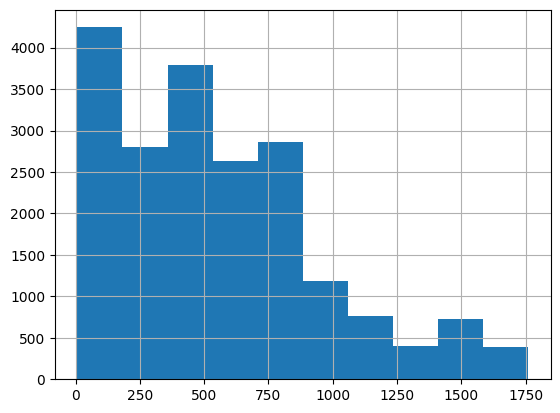

In [18]:
# Check if the distribution is skew in numerical variable
transaction_df['standard_cost'].hist()
# Right skew, could use median to fill in missing value

In [19]:
# Using median to fill in missing values
# # Inspect missing values in the dataset
# print(transaction_df.isnull().values.sum())
# # Impute the missing values with median imputation
# transaction_df[["standard_cost"]] = transaction_df[["standard_cost"]].fillna(transaction_df[["standard_cost"]].median())
# # Count the number of NaNs in the dataset to verify
# print(transaction_df.isnull().values.sum())

In [20]:
# Using regression to fill in missing values
from sklearn.linear_model import LinearRegression
train_data = transaction_df.dropna(subset=['standard_cost'])
missing_data = transaction_df[transaction_df['standard_cost'].isnull()]
model = LinearRegression()
model.fit(train_data[['list_price']], train_data['standard_cost'])
predicted_costs = model.predict(missing_data[['list_price']])
transaction_df.loc[transaction_df['standard_cost'].isnull(), 'standard_cost'] = predicted_costs
transaction_df

0     transaction_id product_id customer_id     transaction_date online_order  \
1                  1          2        2950  2017-02-25 00:00:00        False   
2                  2          3        3120  2017-05-21 00:00:00         True   
3                  3         37         402  2017-10-16 00:00:00        False   
4                  4         88        3135  2017-08-31 00:00:00        False   
5                  5         78         787  2017-10-01 00:00:00         True   
...              ...        ...         ...                  ...          ...   
19996          19996         51        1018  2017-06-24 00:00:00         True   
19997          19997         41         127  2017-11-09 00:00:00         True   
19998          19998         87        2284  2017-04-14 00:00:00         True   
19999          19999          6        2764  2017-07-03 00:00:00        False   
20000          20000         11        1144  2017-09-22 00:00:00         True   

0     order_status           brand product_line product_class product_size  \
1         Approved           Solex     Standard        medium       medium   
2         Approved   Trek Bicycles     Standard        medium        large   
3         Approved      OHM Cycles     Standard           low       medium   
4         Approved  Norco Bicycles     Standard        medium       medium   
5         Approved  Giant Bicycles     Standard        medium        large   
...            ...             ...          ...           ...          ...   
19996     Approved      OHM Cycles     Standard          high       medium   
19997     Approved           Solex         Road        medium       medium   
19998     Approved      OHM Cycles     Standard        medium       medium   
19999     Approved      OHM Cycles     Standard          high       medium   
20000     Approved   Trek Bicycles     Standard        medium        small   

0     list_price standard_cost product_first_sold_date  
1          71.49         53.62                   41245  
2        2091.47        388.92                   41701  
3        1793.43        248.82                   36361  
4        1198.46         381.1                   36145  
5         1765.3        709.48                   42226  
...          ...           ...                     ...  
19996    2005.66        1203.4                   37823  
19997     416.98        312.74                   35560  
19998     1636.9         44.71                   40410  
19999     227.88        136.73                   38216  
20000    1775.81       1580.47                   36334  

[20000 rows x 13 columns]

In [21]:
transaction_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 1 to 20000
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   transaction_id           20000 non-null  object
 1   product_id               20000 non-null  object
 2   customer_id              20000 non-null  object
 3   transaction_date         20000 non-null  object
 4   online_order             19640 non-null  object
 5   order_status             20000 non-null  object
 6   brand                    19803 non-null  object
 7   product_line             19803 non-null  object
 8   product_class            19803 non-null  object
 9   product_size             19803 non-null  object
 10  list_price               20000 non-null  object
 11  standard_cost            20000 non-null  object
 12  product_first_sold_date  19803 non-null  object
dtypes: object(13)
memory usage: 2.0+ MB


## Fill in missing value for categorical variables

In [22]:
 # group by -> count
transaction_df['product_line'].value_counts()

product_line
Standard    14176
Road         3970
Touring      1234
Mountain      423
Name: count, dtype: int64

In [23]:
transaction_df['product_line'].value_counts().index[0]

'Standard'

In [24]:
for col in transaction_df.columns:
    # Check if the column is of object type
    if transaction_df[col].dtypes == 'object':
        # Impute with the most frequent value
        transaction_df[col] = transaction_df[col].fillna(transaction_df[col].value_counts().index[0])
# Count the number of NaNs in the dataset and print the counts to verify
print(transaction_df.isnull().values.sum())

0


<ipython-input-24-0ff26b7e3a8b>:5: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  transaction_df[col] = transaction_df[col].fillna(transaction_df[col].value_counts().index[0])
<ipython-input-24-0ff26b7e3a8b>:5: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  transaction_df[col] = transaction_df[col].fillna(transaction_df[col].value_counts().index[0])
<ipython-input-24-0ff26b7e3a8b>:5: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To 

In [25]:
# Fill in all missing values
transaction_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 1 to 20000
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   transaction_id           20000 non-null  int64         
 1   product_id               20000 non-null  int64         
 2   customer_id              20000 non-null  int64         
 3   transaction_date         20000 non-null  datetime64[ns]
 4   online_order             20000 non-null  bool          
 5   order_status             20000 non-null  object        
 6   brand                    20000 non-null  object        
 7   product_line             20000 non-null  object        
 8   product_class            20000 non-null  object        
 9   product_size             20000 non-null  object        
 10  list_price               20000 non-null  float64       
 11  standard_cost            20000 non-null  float64       
 12  product_first_sold_date  20000 n

## For customer demographic dataset

## Fill in missing value for numerical variables

In [26]:
customerdemographic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 12 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   customer_id                          4000 non-null   int64  
 1   name                                 4000 non-null   object 
 2   gender                               4000 non-null   object 
 3   past_3_years_bike_related_purchases  4000 non-null   int64  
 4   DOB                                  3913 non-null   object 
 5   age                                  3999 non-null   float64
 6   job_title                            3494 non-null   object 
 7   job_industry_category                3344 non-null   object 
 8   wealth_segment                       4000 non-null   object 
 9   deceased_indicator                   4000 non-null   object 
 10  owns_car                             4000 non-null   object 
 11  tenure                        

<Axes: >

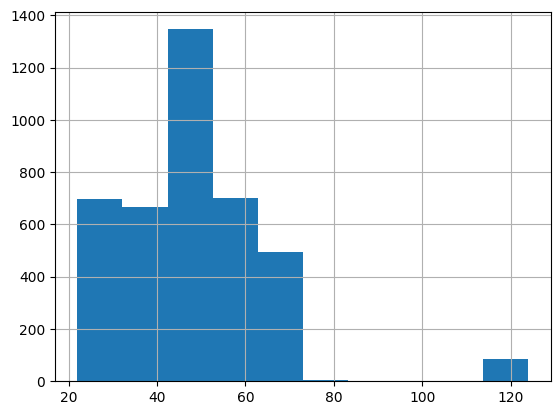

In [27]:
# Check if the distribution is skew in numerical variable
customerdemographic_df['age'].hist()
# not skew, fill in missing value with mean

<Axes: >

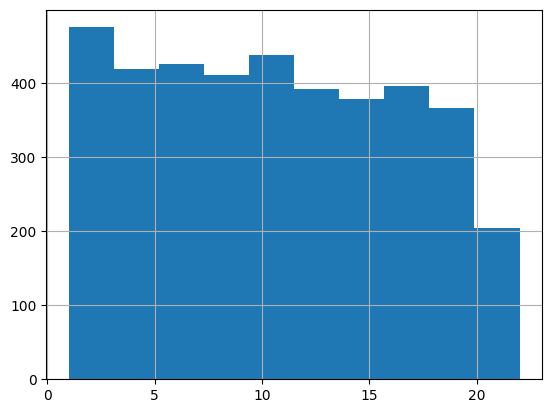

In [28]:
# Check if the distribution is skew in numerical variable
customerdemographic_df['tenure'].hist()
# not skew, fill in missing value with mean

In [29]:
# Inspect missing values in the dataset
print(customerdemographic_df.isnull().values.sum())
# Replace age of 124 to null value
new_age = customerdemographic_df[["age"]].replace(124.0, np.NaN)
customerdemographic_df[["age"]] = new_age
# Impute the missing values with mean imputation
customerdemographic_df[["age"]] = customerdemographic_df[["age"]].fillna(customerdemographic_df[["age"]].mean())
customerdemographic_df[["tenure"]] = customerdemographic_df[["tenure"]].fillna(customerdemographic_df[["tenure"]].mean())
# Count the number of NaNs in the dataset to verify
print(customerdemographic_df.isnull().values.sum())

1337
1249


In [30]:
customerdemographic_df[["age"]]

age
0     46.262526
1     46.262526
2     46.262526
3     46.262526
4     46.262526
...         ...
3995  22.000000
3996  22.000000
3997  22.000000
3998  22.000000
3999  22.000000

[4000 rows x 1 columns]

In [31]:
customerdemographic_df[["tenure"]]

tenure
0     20.000000
1     10.657041
2     10.657041
3     10.657041
4     10.657041
...         ...
3995   1.000000
3996   1.000000
3997   1.000000
3998   1.000000
3999   1.000000

[4000 rows x 1 columns]

In [32]:
customerdemographic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 12 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   customer_id                          4000 non-null   int64  
 1   name                                 4000 non-null   object 
 2   gender                               4000 non-null   object 
 3   past_3_years_bike_related_purchases  4000 non-null   int64  
 4   DOB                                  3913 non-null   object 
 5   age                                  4000 non-null   float64
 6   job_title                            3494 non-null   object 
 7   job_industry_category                3344 non-null   object 
 8   wealth_segment                       4000 non-null   object 
 9   deceased_indicator                   4000 non-null   object 
 10  owns_car                             4000 non-null   object 
 11  tenure                        

## Fill in missing value for categorical variables

In [33]:
 # group by -> count
customerdemographic_df['job_industry_category'].value_counts()

job_industry_category
Manufacturing         799
Financial Services    774
Health                602
Retail                358
Property              267
IT                    223
Entertainment         136
Agriculture           113
Telecommunications     72
Name: count, dtype: int64

In [34]:
customerdemographic_df['job_industry_category'].value_counts().index[0]

'Manufacturing'

In [35]:
# replace unknown gender to null value (fill in missing value later)
new_gender = customerdemographic_df[["gender"]].replace('U',np.NaN)
customerdemographic_df[["gender"]] = new_gender
customerdemographic_df

customer_id               name  gender  \
0              34  Jephthah Bachmann     NaN   
1             144    Jory Barrabeale     NaN   
2             168   Reggie Broggetti     NaN   
3             267      Edgar Buckler     NaN   
4             290     Giorgio Kevane     NaN   
...           ...                ...     ...   
3995         2858    Benedicto Radki    Male   
3996         3173            Angelo     Male   
3997         3435    Stevena Allcock  Female   
3998         3949  Costa Sleightholm    Male   
3999         3997      Blanch Nisuis  Female   

      past_3_years_bike_related_purchases                  DOB        age  \
0                                      59           1843-12-21  46.262526   
1                                      71                  NaN  46.262526   
2                                       8                  NaN  46.262526   
3                                      53                  NaN  46.262526   
4                                      42                  NaN  46.262526   
...                                   ...                  ...        ...   
3995                                    4  2002-01-09 00:00:00  22.000000   
3996                                   55  2001-10-10 00:00:00  22.000000   
3997                                   80  2002-01-15 00:00:00  22.000000   
3998                                   24  2001-12-19 00:00:00  22.000000   
3999                                   87  2001-07-13 00:00:00  22.000000   

                       job_title job_industry_category     wealth_segment  \
0                Legal Assistant                    IT  Affluent Customer   
1             Environmental Tech                    IT      Mass Customer   
2                General Manager                    IT  Affluent Customer   
3                            NaN                    IT     High Net Worth   
4         Senior Sales Associate                    IT      Mass Customer   
...                          ...                   ...                ...   
3995          Recruiting Manager                   NaN      Mass Customer   
3996  Computer Systems Analyst I                Health      Mass Customer   
3997               Senior Editor                   NaN  Affluent Customer   
3998             Web Designer IV         Manufacturing     High Net Worth   
3999             Statistician II         Manufacturing     High Net Worth   

     deceased_indicator owns_car     tenure  
0                     N       No  20.000000  
1                     N       No  10.657041  
2                     N      Yes  10.657041  
3                     N       No  10.657041  
4                     N       No  10.657041  
...                 ...      ...        ...  
3995                  N      Yes   1.000000  
3996                  N      Yes   1.000000  
3997                  N       No   1.000000  
3998                  N      Yes   1.000000  
3999                  N      Yes   1.000000  

[4000 rows x 12 columns]

In [36]:
for col in customerdemographic_df.columns:
    # Check if the column is of object type
    if customerdemographic_df[col].dtypes == 'object':
        # Impute with the most frequent value
       customerdemographic_df[col] = customerdemographic_df[col].fillna(customerdemographic_df[col].value_counts().index[0])
# Count the number of NaNs in the dataset and print the counts to verify
print(customerdemographic_df.isnull().values.sum())

0


In [37]:
# Fill in all missing values
print(customerdemographic_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 12 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   customer_id                          4000 non-null   int64  
 1   name                                 4000 non-null   object 
 2   gender                               4000 non-null   object 
 3   past_3_years_bike_related_purchases  4000 non-null   int64  
 4   DOB                                  4000 non-null   object 
 5   age                                  4000 non-null   float64
 6   job_title                            4000 non-null   object 
 7   job_industry_category                4000 non-null   object 
 8   wealth_segment                       4000 non-null   object 
 9   deceased_indicator                   4000 non-null   object 
 10  owns_car                             4000 non-null   object 
 11  tenure                        

## For customer address dataset

In [38]:
# replace 'New South Wales' to 'NSW' and 'Victoria' to 'VIC'
new_state1 = customeraddress_df[["state"]].replace('New South Wales','NSW')
customeraddress_df[["state"]] = new_state1
new_state2 = customeraddress_df[["state"]].replace('Victoria','VIC')
customeraddress_df[["state"]] = new_state2
customeraddress_df

0    customer_id                    address postcode state    country  \
1              1         060 Morning Avenue     2016   NSW  Australia   
2              2        6 Meadow Vale Court     2153   NSW  Australia   
3              4         0 Holy Cross Court     4211   QLD  Australia   
4              5        17979 Del Mar Point     2448   NSW  Australia   
5              6           9 Oakridge Court     3216   VIC  Australia   
...          ...                        ...      ...   ...        ...   
3995        3999            1482 Hauk Trail     3064   VIC  Australia   
3996        4000  57042 Village Green Point     4511   QLD  Australia   
3997        4001     87 Crescent Oaks Alley     2756   NSW  Australia   
3998        4002           8194 Lien Street     4032   QLD  Australia   
3999        4003            320 Acker Drive     2251   NSW  Australia   

0    property_valuation  
1                    10  
2                    10  
3                     9  
4                     4  
5                     9  
...                 ...  
3995                  3  
3996                  6  
3997                 10  
3998                  7  
3999                  7  

[3999 rows x 6 columns]

In [39]:
customeraddress_df.info()
# There is no missing value to fill in

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 1 to 3999
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   customer_id         3999 non-null   object
 1   address             3999 non-null   object
 2   postcode            3999 non-null   object
 3   state               3999 non-null   object
 4   country             3999 non-null   object
 5   property_valuation  3999 non-null   object
dtypes: object(6)
memory usage: 187.6+ KB


# Bonus point 3: EDA - Transaction table merge customer table - dist - strip - rel - heatmap......

In [40]:
# merge transactions table, customerdemographic table & cutomeraddress table
merge1 = pd.merge(transaction_df, customerdemographic_df, how="left", on="customer_id")
merge2 = pd.merge(merge1, customeraddress_df, how="left", on="customer_id")
merge2

transaction_id  product_id customer_id transaction_date  online_order  \
0                   1           2        2950       2017-02-25         False   
1                   2           3        3120       2017-05-21          True   
2                   3          37         402       2017-10-16         False   
3                   4          88        3135       2017-08-31         False   
4                   5          78         787       2017-10-01          True   
...               ...         ...         ...              ...           ...   
19995           19996          51        1018       2017-06-24          True   
19996           19997          41         127       2017-11-09          True   
19997           19998          87        2284       2017-04-14          True   
19998           19999           6        2764       2017-07-03         False   
19999           20000          11        1144       2017-09-22          True   

      order_status           brand product_line product_class product_size  \
0         Approved           Solex     Standard        medium       medium   
1         Approved   Trek Bicycles     Standard        medium        large   
2         Approved      OHM Cycles     Standard           low       medium   
3         Approved  Norco Bicycles     Standard        medium       medium   
4         Approved  Giant Bicycles     Standard        medium        large   
...            ...             ...          ...           ...          ...   
19995     Approved      OHM Cycles     Standard          high       medium   
19996     Approved           Solex         Road        medium       medium   
19997     Approved      OHM Cycles     Standard        medium       medium   
19998     Approved      OHM Cycles     Standard          high       medium   
19999     Approved   Trek Bicycles     Standard        medium        small   

       ...  job_industry_category     wealth_segment  deceased_indicator  \
0      ...     Financial Services      Mass Customer                   N   
1      ...                 Health      Mass Customer                   N   
2      ...                 Retail  Affluent Customer                   N   
3      ...     Financial Services      Mass Customer                   N   
4      ...                 Retail  Affluent Customer                   N   
...    ...                    ...                ...                 ...   
19995  ...          Manufacturing      Mass Customer                   N   
19996  ...     Financial Services      Mass Customer                   N   
19997  ...     Telecommunications     High Net Worth                   N   
19998  ...     Financial Services      Mass Customer                   N   
19999  ...                 Health     High Net Worth                   N   

      owns_car tenure               address postcode  state    country  \
0          Yes   10.0     984 Hoepker Court     3064    VIC  Australia   
1          Yes   10.0       4 Shopko Circle     2196    NSW  Australia   
2           No   22.0    586 Miller Parkway     2835    NSW  Australia   
3           No   16.0   1617 Harper Parkway     2096    NSW  Australia   
4          Yes    2.0    0601 Stephen Place     2292    NSW  Australia   
...        ...    ...                   ...      ...    ...        ...   
19995      Yes    7.0         3 Hayes Court     3109    VIC  Australia   
19996       No   19.0    0 Pearson Crossing     4405    QLD  Australia   
19997       No   14.0  10055 Old Shore Lane     3630    VIC  Australia   
19998      Yes   20.0       1 Wayridge Park     4301    QLD  Australia   
19999      Yes    5.0      4439 7th Terrace     2177    NSW  Australia   

      property_valuation  
0                      6  
1                      5  
2                      1  
3                     10  
4                      7  
...                  ...  
19995                 10  
19996                  1  
19997                  1  
19998                  1  
19999     

<ipython-input-41-75f7612a7099>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(merge2['profit'], bins=40, hist=True, kde=True, rug=True, fit=None, color='g', vertical=False)


<Axes: xlabel='profit', ylabel='Density'>

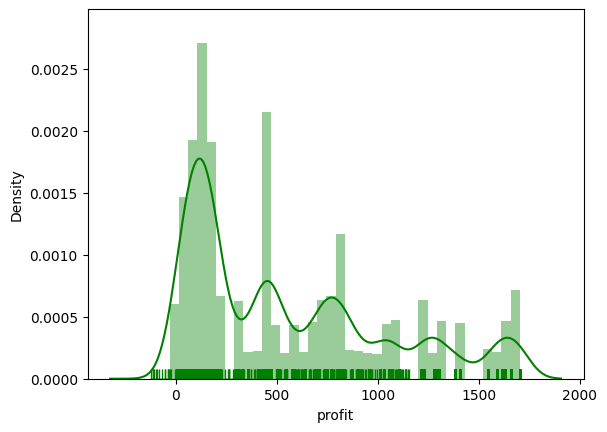

In [41]:
# distribution of numerical variable in the above dataset
# profit = list_price - standard_cost
merge2['profit'] = merge2['list_price'] - merge2['standard_cost']
sns.distplot(merge2['profit'], bins=40, hist=True, kde=True, rug=True, fit=None, color='g', vertical=False)
# right skew

<ipython-input-42-dfa96bd71181>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(merge2['past_3_years_bike_related_purchases'], bins=40, hist=True, kde=True, rug=True, fit=None, color='g', vertical=False)


<Axes: xlabel='past_3_years_bike_related_purchases', ylabel='Density'>

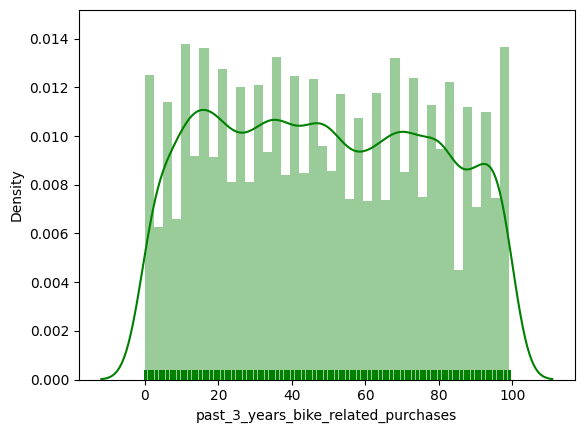

In [42]:
# past_3_years_bike_related_purchases
sns.distplot(merge2['past_3_years_bike_related_purchases'], bins=40, hist=True, kde=True, rug=True, fit=None, color='g', vertical=False)

<ipython-input-43-53bf419c6903>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(merge2['age'], bins=40, hist=True, kde=True, rug=True, fit=None, color='g', vertical=False)


<Axes: xlabel='age', ylabel='Density'>

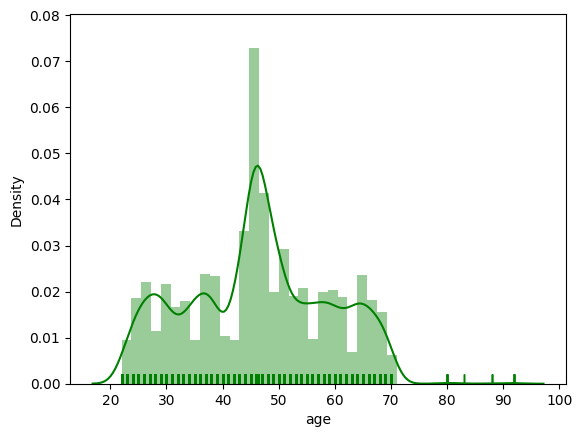

In [43]:
# age
sns.distplot(merge2['age'], bins=40, hist=True, kde=True, rug=True, fit=None, color='g', vertical=False)

<ipython-input-44-816403f410b4>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(merge2['tenure'], bins=40, hist=True, kde=True, rug=True, fit=None, color='g', vertical=False)


<Axes: xlabel='tenure', ylabel='Density'>

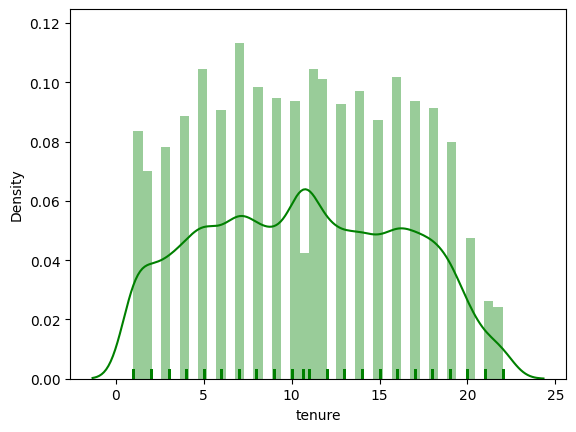

In [44]:
# tenure
sns.distplot(merge2['tenure'], bins=40, hist=True, kde=True, rug=True, fit=None, color='g', vertical=False)

## Stripplot

### relationship between numerical and categorical

<ipython-input-45-d955824aeeee>:4: FutureWarning: Use "auto" to set automatic grayscale colors. From v0.14.0, "gray" will default to matplotlib's definition.
  sns.stripplot(x='job_industry_category', y='profit', hue='gender', data=merge2,


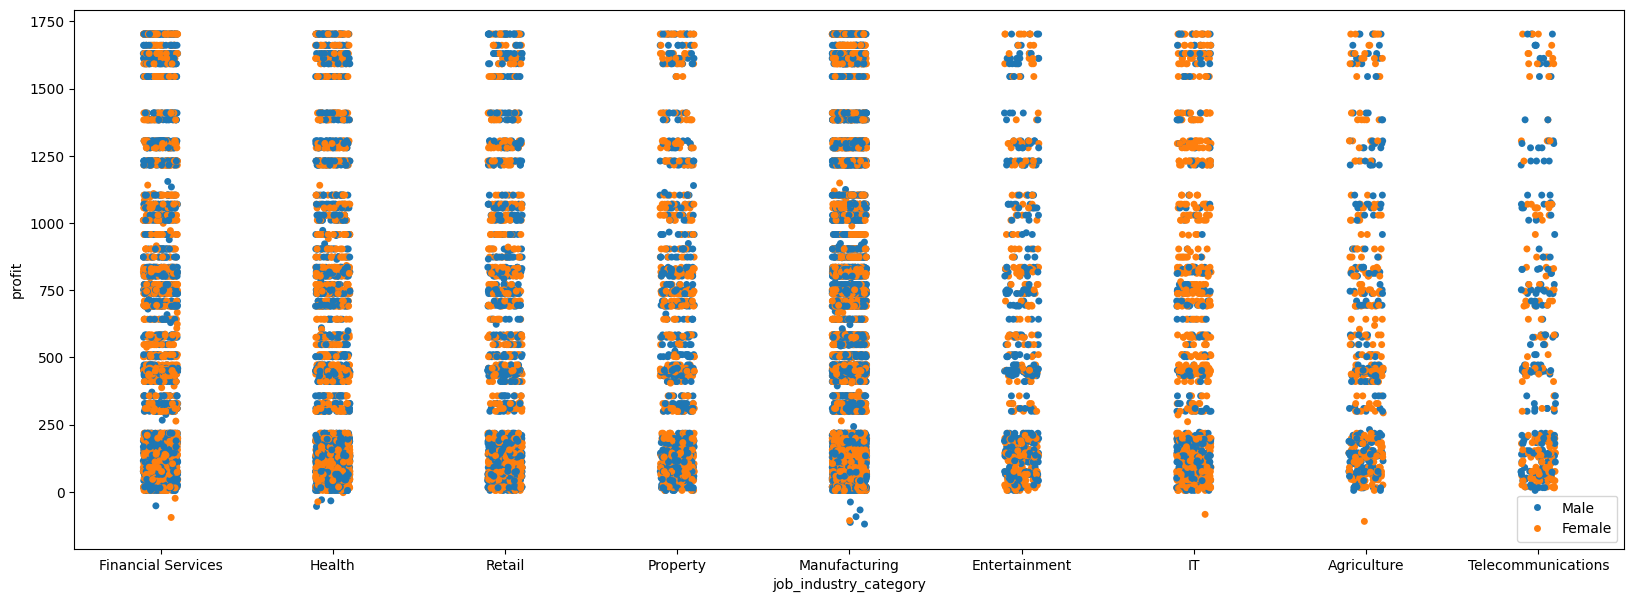

In [45]:
# three dimensions
# job_industry_category vs. gender vs. profit
plt.figure(figsize=(20, 7))
sns.stripplot(x='job_industry_category', y='profit', hue='gender', data=merge2,
                      color=None, palette=None, size=5,
                      edgecolor="gray", linewidth=0,
                      ax=None)
plt.legend(loc='best')

/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 8.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


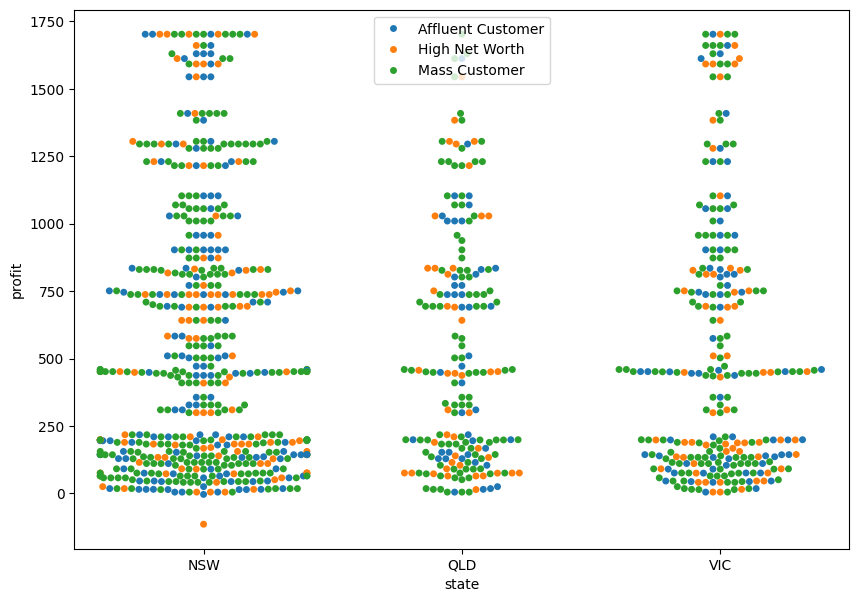

In [46]:
# state vs. wealth_segment vs. profit
plt.figure(figsize=(10, 7))
sns.swarmplot(x='state', y='profit', hue='wealth_segment', data=merge2.sample(1000))
plt.legend(loc = 'best')

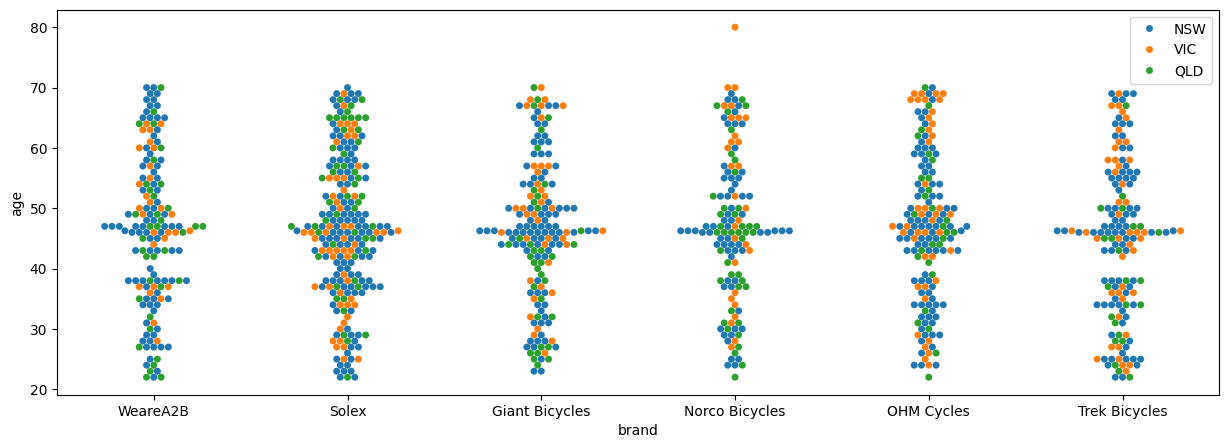

In [47]:
# brand vs. state vs. age
plt.figure(figsize=(15, 5))
sns.swarmplot(x='brand', y='age', hue='state', data=merge2.sample(1000))
plt.legend(loc = 'best')

<Figure size 1500x700 with 0 Axes>

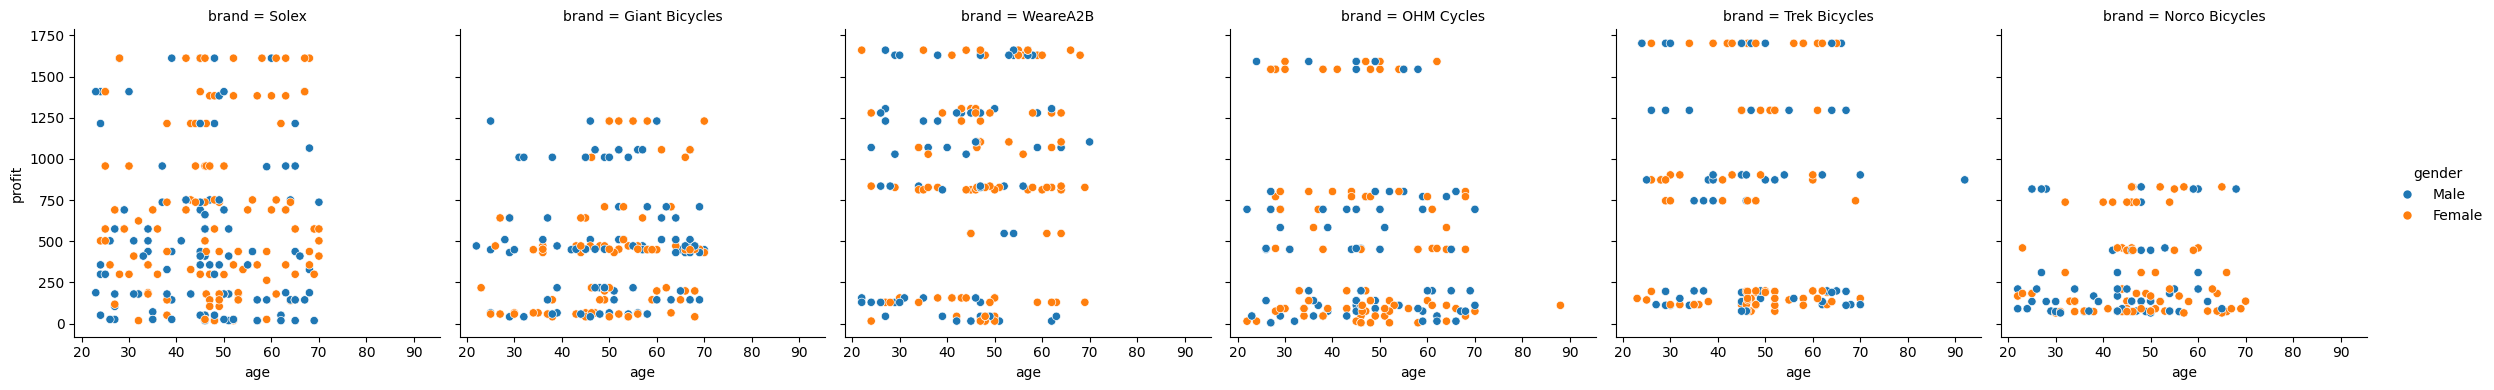

In [48]:
# four dimensions
# relational plot
# age vs. profit vs. gender vs. brand
plt.figure(figsize=(15, 7))
sns.color_palette('pastel')
ax = sns.relplot(data=merge2.sample(1000), kind='scatter', x='age', y='profit', hue='gender', col='brand', height=4)
plt.show()

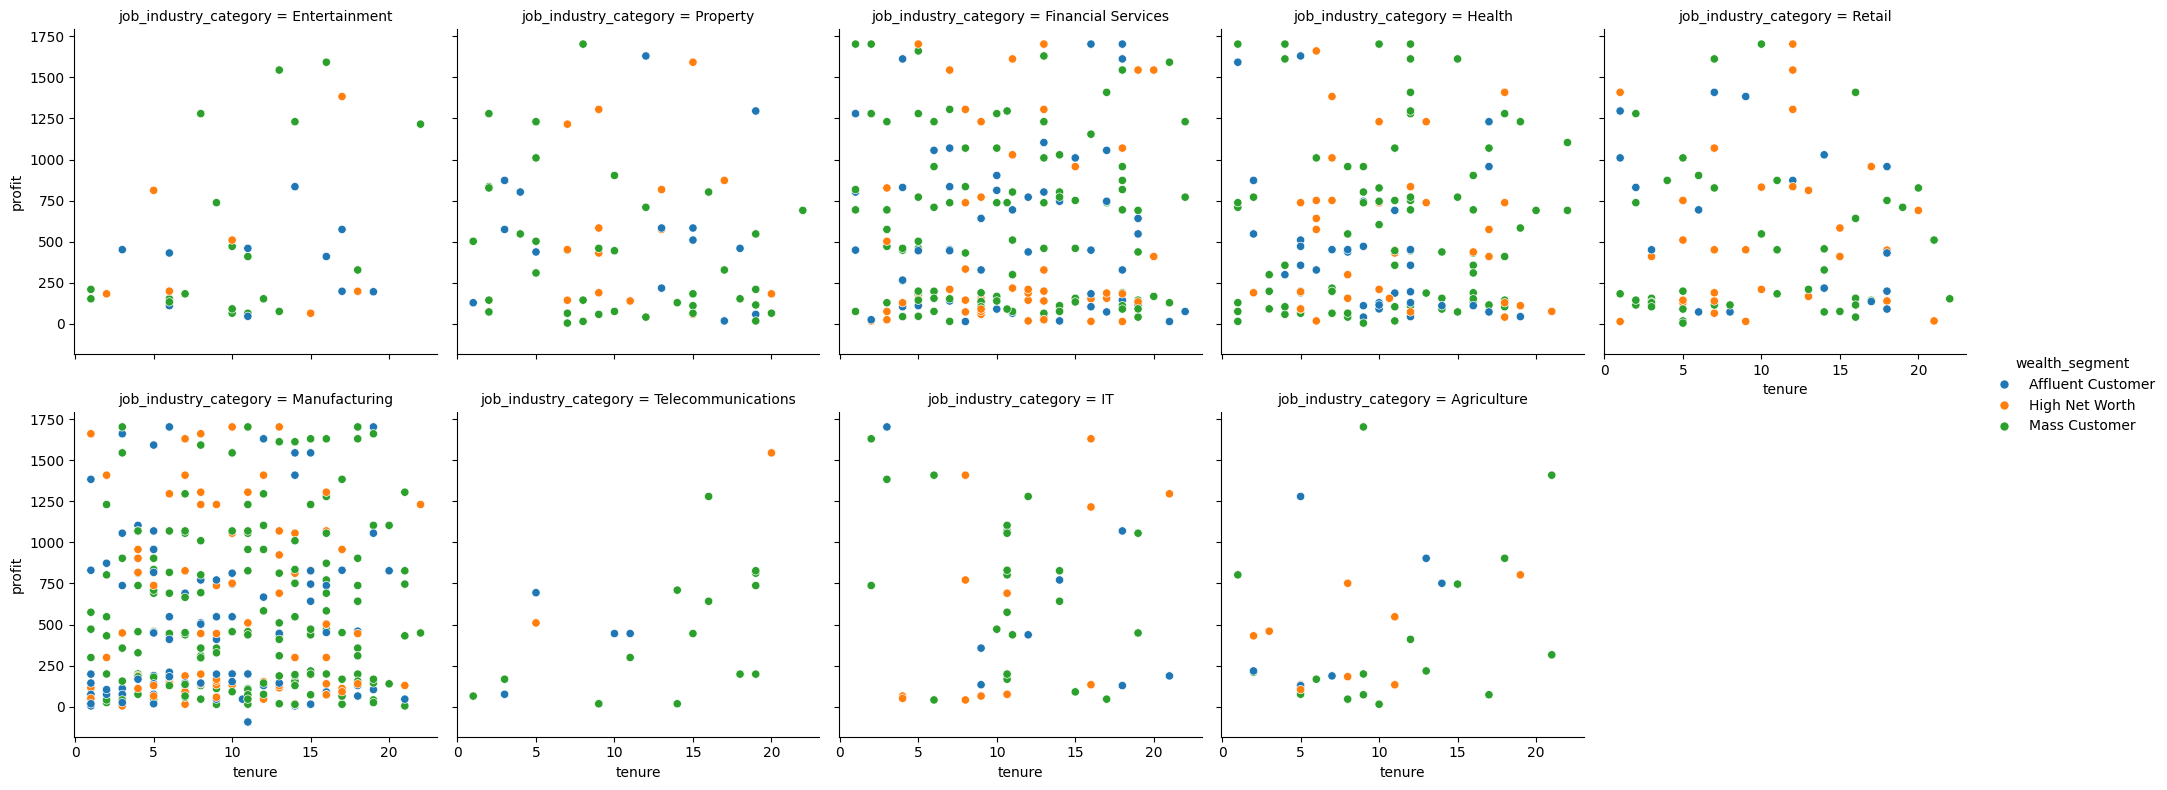

In [49]:
# relational plot
# tenure vs. profit vs. wealth_segment vs. job_category_industry
sns.color_palette('pastel')
ax = sns.relplot(data=merge2.sample(1000), kind='scatter', x='tenure', y='profit', hue='wealth_segment', col='job_industry_category', height=4, col_wrap=5)
plt.show()

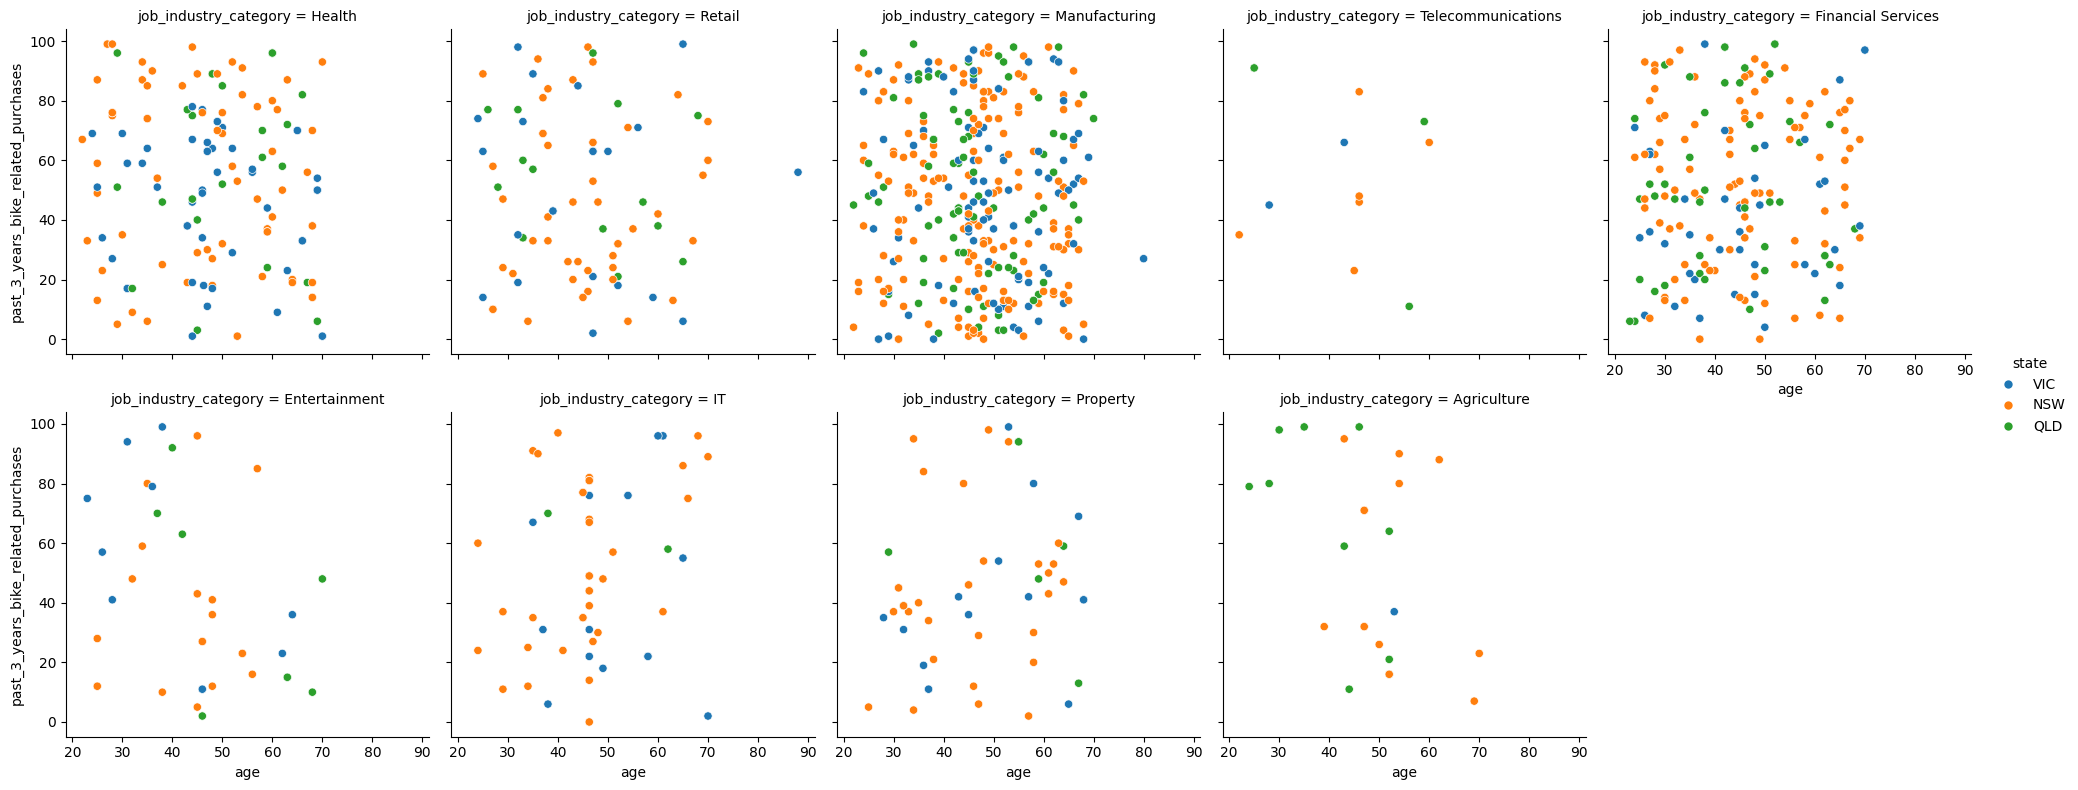

In [50]:
# relational plot
# past_3_years_bike_related_purchases vs. age vs. state vs. job_category_industry
sns.color_palette('pastel')
ax = sns.relplot(data=merge2.sample(1000), kind='scatter', x='age', y='past_3_years_bike_related_purchases', hue='state', col='job_industry_category', height=4, col_wrap=5)
plt.show()

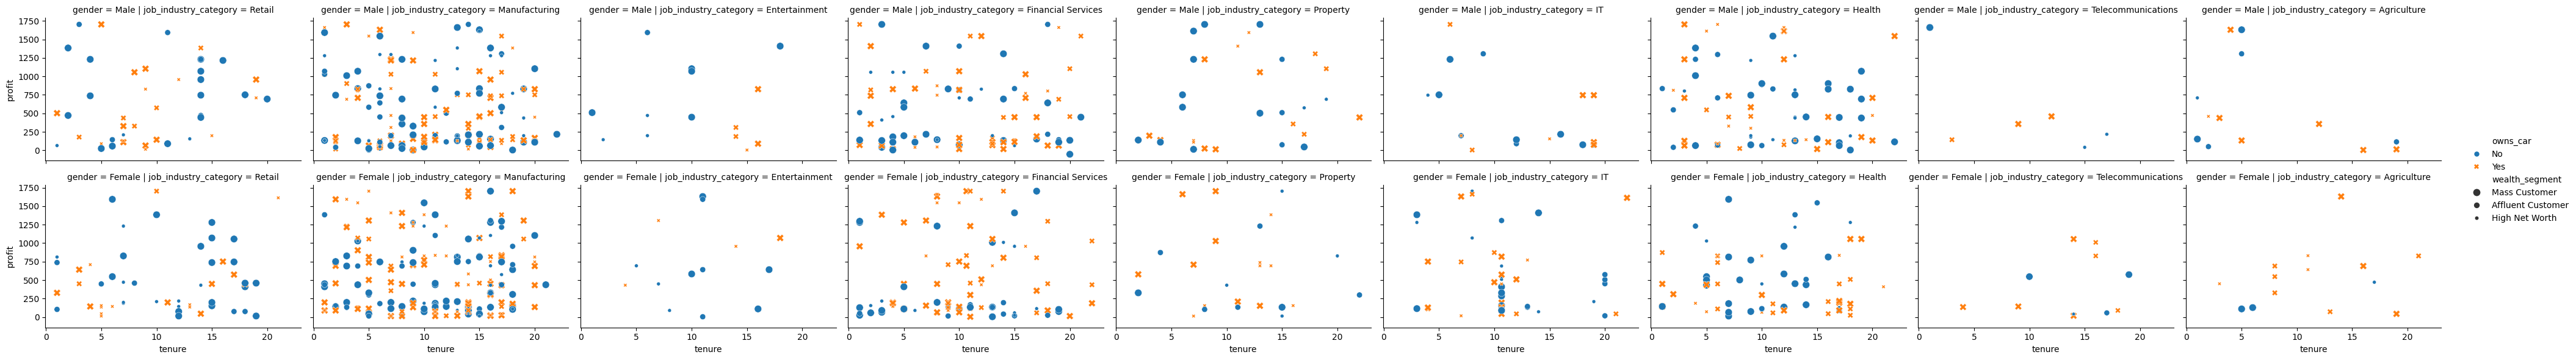

In [51]:
# multi-dimensions
sns.color_palette('pastel')
ax = sns.relplot(data=merge2.sample(1000), kind='scatter', x='tenure',y='profit',hue='owns_car',col='job_industry_category', height=3, style='owns_car',
                 size='wealth_segment', row='gender', aspect=1.5)
plt.show()

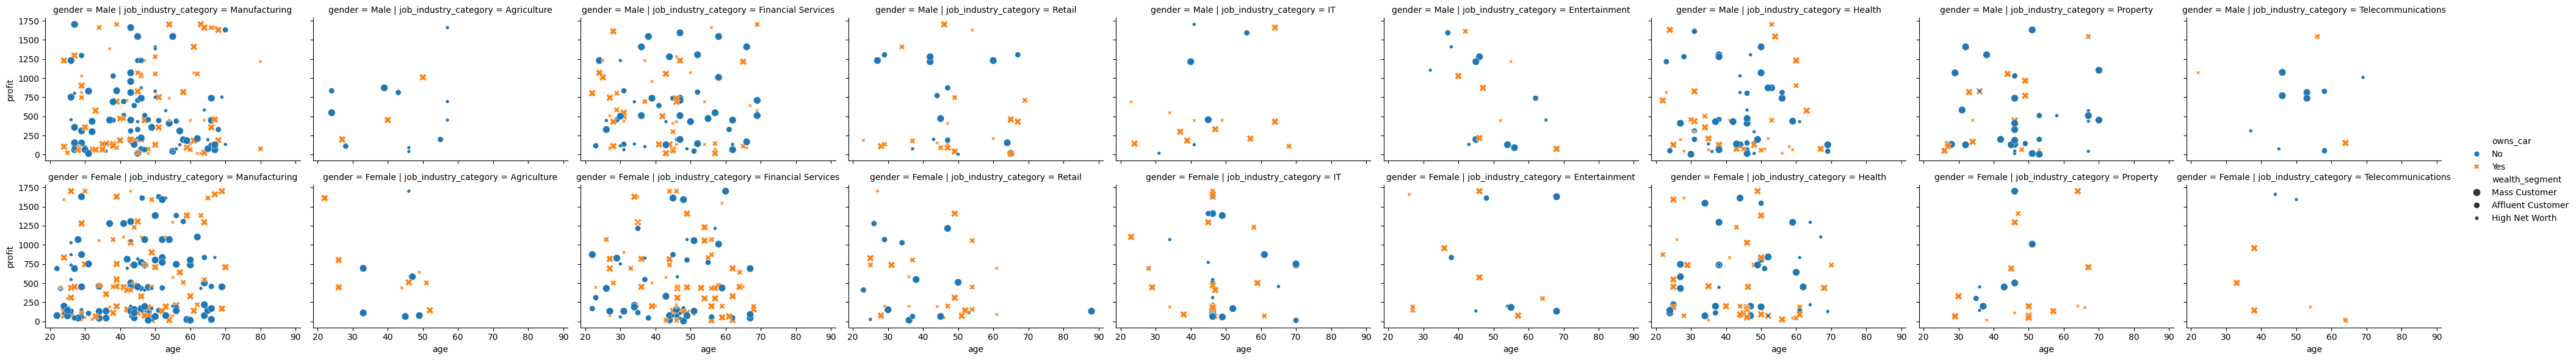

In [52]:
sns.color_palette('pastel')
ax = sns.relplot(data=merge2.sample(1000), kind='scatter', x='age',y='profit',hue='owns_car',col='job_industry_category', height=3, style='owns_car',
                 size='wealth_segment', row='gender', aspect=1.5)
plt.show()

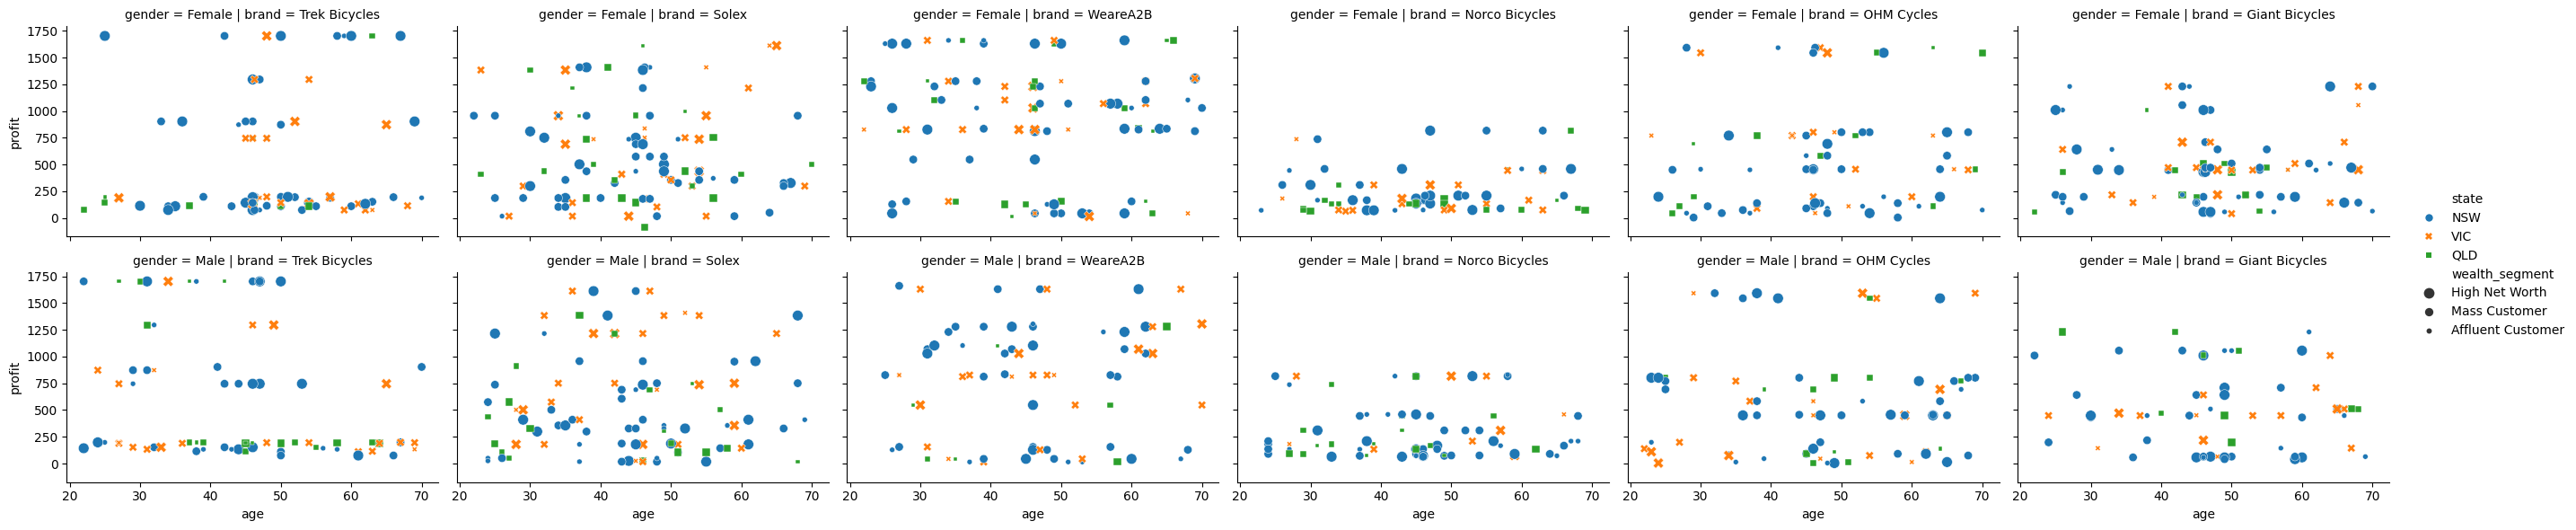

In [53]:
sns.color_palette('pastel')
ax = sns.relplot(data=merge2.sample(1000), kind='scatter', x='age',y='profit',hue='state',col='brand', height=3, style='state',
                 size='wealth_segment', row='gender', aspect=1.5)
plt.show()

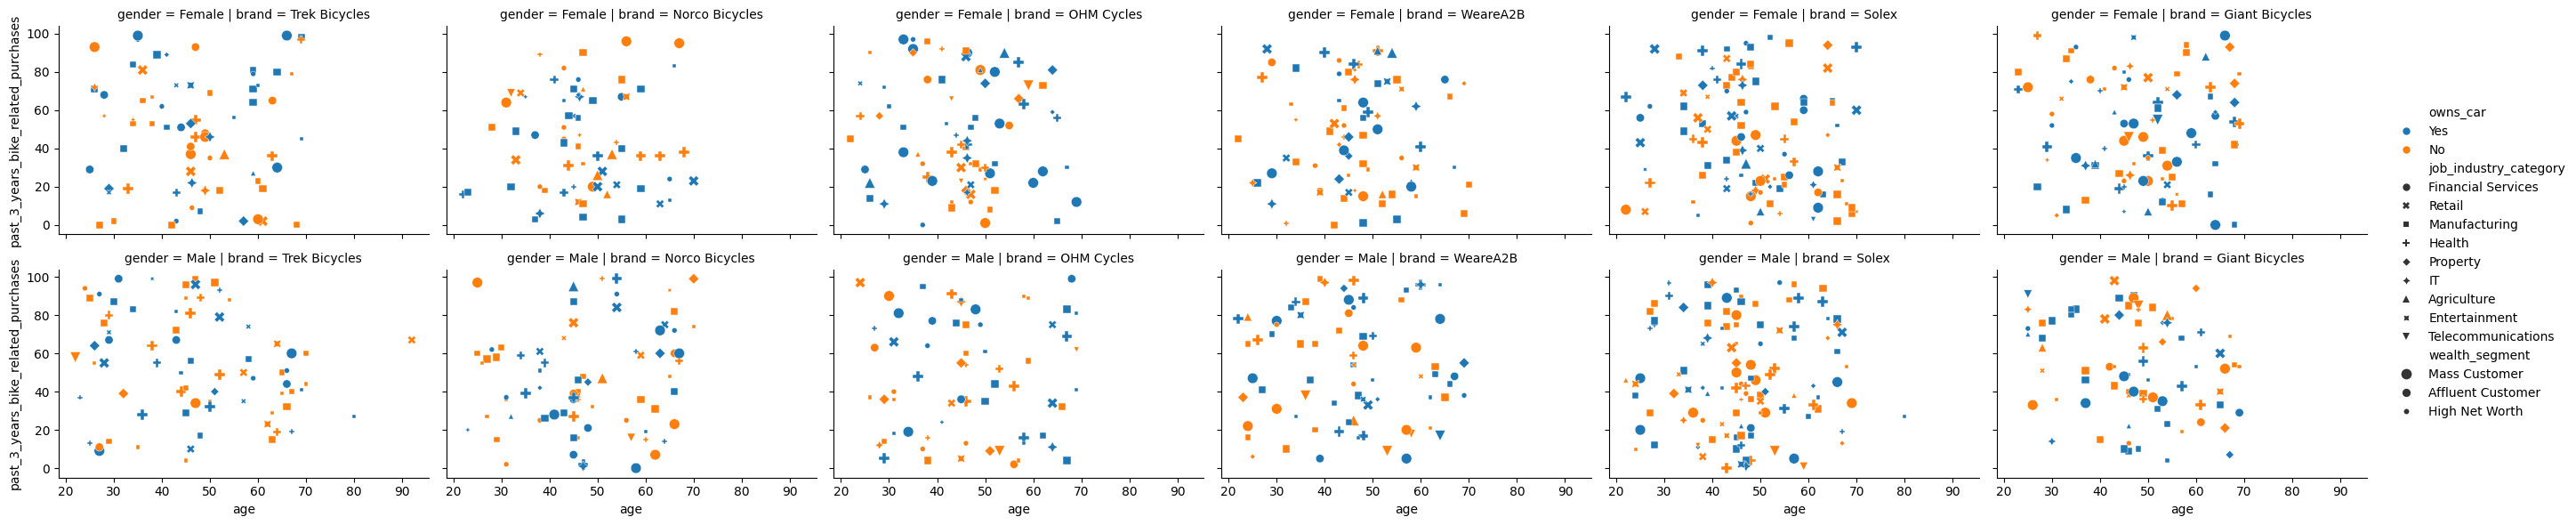

In [54]:
sns.color_palette('pastel')
ax = sns.relplot(data=merge2.sample(1000), kind='scatter', x='age',y='past_3_years_bike_related_purchases',hue='owns_car',col='brand', height=3, style='job_industry_category',
                 size='wealth_segment', row='gender', aspect=1.5)
plt.show()

### relationship between numerical and numerical

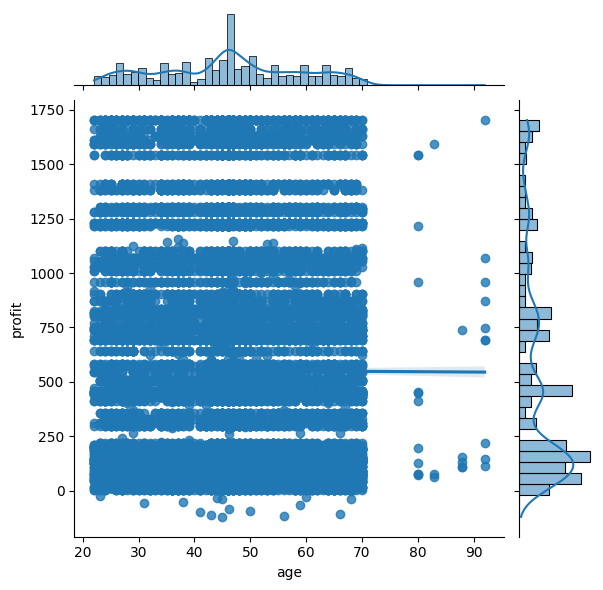

In [55]:
# profit vs age
sns.jointplot(x='age', y='profit',
                      data=merge2,  kind="reg",
                      color=None, ratio=5,
                      dropna=True, xlim=None,
                      ylim=None)

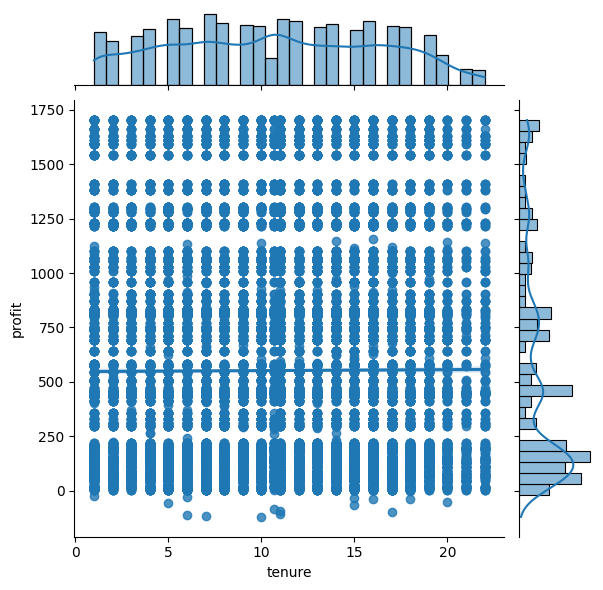

In [56]:
# profit vs tenure
sns.jointplot(x='tenure', y='profit',
                      data=merge2,  kind="reg",
                      color=None, ratio=5,
                      dropna=True, xlim=None,
                      ylim=None)

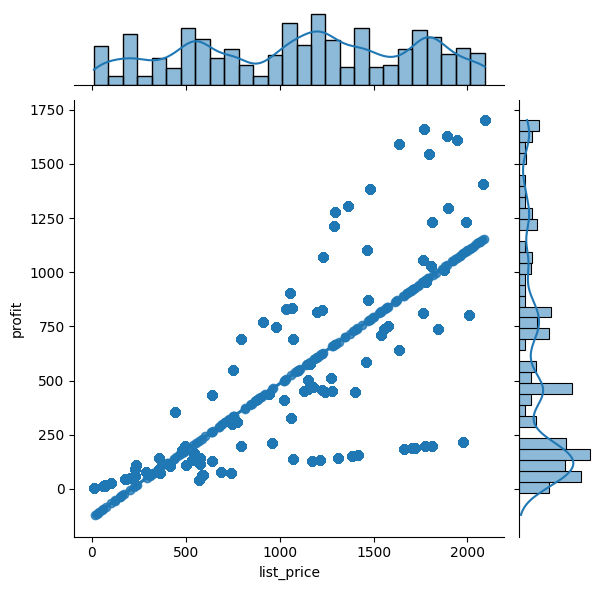

In [57]:
# list_price vs profit
sns.jointplot(x='list_price', y='profit',
                      data=merge2,  kind="reg",
                      color=None, ratio=5,
                      dropna=True, xlim=None,
                      ylim=None)

<Axes: >

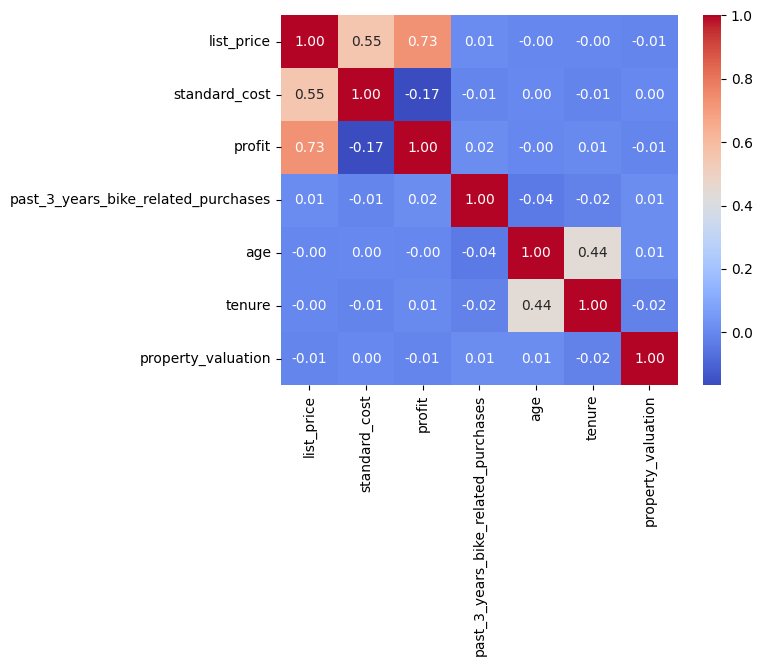

In [58]:
# Heatmap
# correlation coefficients, strong/moderate/weak
# relation between multiple numerical variables
sns.heatmap(merge2[["list_price","standard_cost","profit","past_3_years_bike_related_purchases","age",'tenure','property_valuation']].corr(), annot=True, fmt=".2f", cmap = "coolwarm")

# Cohort Analysis

##Assigned the cohorts and calculated the monthly offset

In [59]:
transaction_df

0      transaction_id  product_id  customer_id transaction_date  online_order  \
1                   1           2         2950       2017-02-25         False   
2                   2           3         3120       2017-05-21          True   
3                   3          37          402       2017-10-16         False   
4                   4          88         3135       2017-08-31         False   
5                   5          78          787       2017-10-01          True   
...               ...         ...          ...              ...           ...   
19996           19996          51         1018       2017-06-24          True   
19997           19997          41          127       2017-11-09          True   
19998           19998          87         2284       2017-04-14          True   
19999           19999           6         2764       2017-07-03         False   
20000           20000          11         1144       2017-09-22          True   

0     order_status           brand product_line product_class product_size  \
1         Approved           Solex     Standard        medium       medium   
2         Approved   Trek Bicycles     Standard        medium        large   
3         Approved      OHM Cycles     Standard           low       medium   
4         Approved  Norco Bicycles     Standard        medium       medium   
5         Approved  Giant Bicycles     Standard        medium        large   
...            ...             ...          ...           ...          ...   
19996     Approved      OHM Cycles     Standard          high       medium   
19997     Approved           Solex         Road        medium       medium   
19998     Approved      OHM Cycles     Standard        medium       medium   
19999     Approved      OHM Cycles     Standard          high       medium   
20000     Approved   Trek Bicycles     Standard        medium        small   

0      list_price  standard_cost  product_first_sold_date  
1           71.49          53.62                    41245  
2         2091.47         388.92                    41701  
3         1793.43         248.82                    36361  
4         1198.46         381.10                    36145  
5         1765.30         709.48                    42226  
...           ...            ...                      ...  
19996     2005.66        1203.40                    37823  
19997      416.98         312.74                    35560  
19998     1636.90          44.71                    40410  
19999      227.88         136.73                    38216  
20000     1775.81        1580.47                    36334  

[20000 rows x 13 columns]

In [60]:
# transaction_date -> transaction_month
# A function that will parse the date Time based cohort:  1 day of month
def get_month(x):
  return dt.datetime(x.year, x.month, 1)
# Create transaction_date column based on month and store in TransactionMonth
transaction_df['TransactionMonth'] = transaction_df['transaction_date'].apply(get_month)
transaction_df

0      transaction_id  product_id  customer_id transaction_date  online_order  \
1                   1           2         2950       2017-02-25         False   
2                   2           3         3120       2017-05-21          True   
3                   3          37          402       2017-10-16         False   
4                   4          88         3135       2017-08-31         False   
5                   5          78          787       2017-10-01          True   
...               ...         ...          ...              ...           ...   
19996           19996          51         1018       2017-06-24          True   
19997           19997          41          127       2017-11-09          True   
19998           19998          87         2284       2017-04-14          True   
19999           19999           6         2764       2017-07-03         False   
20000           20000          11         1144       2017-09-22          True   

0     order_status           brand product_line product_class product_size  \
1         Approved           Solex     Standard        medium       medium   
2         Approved   Trek Bicycles     Standard        medium        large   
3         Approved      OHM Cycles     Standard           low       medium   
4         Approved  Norco Bicycles     Standard        medium       medium   
5         Approved  Giant Bicycles     Standard        medium        large   
...            ...             ...          ...           ...          ...   
19996     Approved      OHM Cycles     Standard          high       medium   
19997     Approved           Solex         Road        medium       medium   
19998     Approved      OHM Cycles     Standard        medium       medium   
19999     Approved      OHM Cycles     Standard          high       medium   
20000     Approved   Trek Bicycles     Standard        medium        small   

0      list_price  standard_cost  product_first_sold_date TransactionMonth  
1           71.49          53.62                    41245       2017-02-01  
2         2091.47         388.92                    41701       2017-05-01  
3         1793.43         248.82                    36361       2017-10-01  
4         1198.46         381.10                    36145       2017-08-01  
5         1765.30         709.48                    42226       2017-10-01  
...           ...            ...                      ...              ...  
19996     2005.66        1203.40                    37823       2017-06-01  
19997      416.98         312.74                    35560       2017-11-01  
19998     1636.90          44.71                    40410       2017-04-01  
19999      227.88         136.73                    38216       2017-07-01  
20000     1775.81        1580.47                    36334       2017-09-01  

[20000 rows x 14 columns]

In [61]:
# Every customer's cohort month:The earliest transaction month for each customer.
transaction_df['CohortMonth'] = transaction_df.groupby('customer_id')['TransactionMonth'].transform('min')
transaction_df

0      transaction_id  product_id  customer_id transaction_date  online_order  \
1                   1           2         2950       2017-02-25         False   
2                   2           3         3120       2017-05-21          True   
3                   3          37          402       2017-10-16         False   
4                   4          88         3135       2017-08-31         False   
5                   5          78          787       2017-10-01          True   
...               ...         ...          ...              ...           ...   
19996           19996          51         1018       2017-06-24          True   
19997           19997          41          127       2017-11-09          True   
19998           19998          87         2284       2017-04-14          True   
19999           19999           6         2764       2017-07-03         False   
20000           20000          11         1144       2017-09-22          True   

0     order_status           brand product_line product_class product_size  \
1         Approved           Solex     Standard        medium       medium   
2         Approved   Trek Bicycles     Standard        medium        large   
3         Approved      OHM Cycles     Standard           low       medium   
4         Approved  Norco Bicycles     Standard        medium       medium   
5         Approved  Giant Bicycles     Standard        medium        large   
...            ...             ...          ...           ...          ...   
19996     Approved      OHM Cycles     Standard          high       medium   
19997     Approved           Solex         Road        medium       medium   
19998     Approved      OHM Cycles     Standard        medium       medium   
19999     Approved      OHM Cycles     Standard          high       medium   
20000     Approved   Trek Bicycles     Standard        medium        small   

0      list_price  standard_cost  product_first_sold_date TransactionMonth  \
1           71.49          53.62                    41245       2017-02-01   
2         2091.47         388.92                    41701       2017-05-01   
3         1793.43         248.82                    36361       2017-10-01   
4         1198.46         381.10                    36145       2017-08-01   
5         1765.30         709.48                    42226       2017-10-01   
...           ...            ...                      ...              ...   
19996     2005.66        1203.40                    37823       2017-06-01   
19997      416.98         312.74                    35560       2017-11-01   
19998     1636.90          44.71                    40410       2017-04-01   
19999      227.88         136.73                    38216       2017-07-01   
20000     1775.81        1580.47                    36334       2017-09-01   

0     CohortMonth  
1      2017-02-01  
2      2017-01-01  
3      2017-01-01  
4      2017-02-01  
5      2017-01-01  
...           ...  
19996  2017-01-01  
19997  2017-01-01  
19998  2017-04-01  
19999  2017-02-01  
20000  2017-03-01  

[20000 rows x 15 columns]

## Calculating time offset in Month as Cohort Index
Calculating the time offset for each transaction allows you to evaluate the metrics for each cohort in a comparable fashion.
First, we will create 6 variables that capture the integer value of years, months, and days for Transaction and Cohort Date using the get_date_int() function.

In [62]:
def get_date_int(df, column):
    year = df[column].dt.year
    month = df[column].dt.month
    day = df[column].dt.day
    return year, month, day
# Getting the integers for date parts from the `transaction_date` column
transcation_year, transaction_month, _ = get_date_int(transaction_df, 'TransactionMonth')
# Getting the integers for date parts from the `cohort_date` column
cohort_year, cohort_month, _ = get_date_int(transaction_df, 'CohortMonth')

In [63]:
# Calculate difference in months
months_diff = transaction_month - cohort_month
""" Extract the difference in months from all previous values
 "+1" in addeded at the end so that first month is marked as 1 instead of 0 for easier interpretation.
 """
transaction_df['CohortIndex'] = months_diff  + 1
transaction_df.head(5)

0  transaction_id  product_id  customer_id transaction_date  online_order  \
1               1           2         2950       2017-02-25         False   
2               2           3         3120       2017-05-21          True   
3               3          37          402       2017-10-16         False   
4               4          88         3135       2017-08-31         False   
5               5          78          787       2017-10-01          True   

0 order_status           brand product_line product_class product_size  \
1     Approved           Solex     Standard        medium       medium   
2     Approved   Trek Bicycles     Standard        medium        large   
3     Approved      OHM Cycles     Standard           low       medium   
4     Approved  Norco Bicycles     Standard        medium       medium   
5     Approved  Giant Bicycles     Standard        medium        large   

0  list_price  standard_cost  product_first_sold_date TransactionMonth  \
1       71.49          53.62                    41245       2017-02-01   
2     2091.47         388.92                    41701       2017-05-01   
3     1793.43         248.82                    36361       2017-10-01   
4     1198.46         381.10                    36145       2017-08-01   
5     1765.30         709.48                    42226       2017-10-01   

0 CohortMonth  CohortIndex  
1  2017-02-01            1  
2  2017-01-01            5  
3  2017-01-01           10  
4  2017-02-01            7  
5  2017-01-01           10

In [64]:
# Counting daily active user from each cohort
# Counting number of unique customer id's falling in each group of CohortMonth and CohortIndex
cohort_data = transaction_df.groupby(['CohortMonth', 'CohortIndex']).nunique()['customer_id'].reset_index()
# Printing top 5 rows of Dataframe
cohort_data.head()

CohortMonth  CohortIndex  customer_id
0  2017-01-01            1         1354
1  2017-01-01            2          486
2  2017-01-01            3          508
3  2017-01-01            4          509
4  2017-01-01            5          502

# Calculate business metrics: Retention rate

**The percentage of active customers compared to the total number of customers after a specific time interval is called retention rate.**
In this section, we will calculate the retention count for each cohort Month paired with cohort Index
Now that we have a count of the retained customers for each cohortMonth and cohortIndex. We will calculate the retention rate for each Cohort.
We will create a pivot table for this purpose.

In [65]:
# transform cohort data into a pivot table
cohort_counts = cohort_data.pivot(index='CohortMonth',  columns ='CohortIndex', values = 'customer_id')
cohort_counts

CohortIndex      1      2      3      4      5      6      7      8      9   \
CohortMonth                                                                   
2017-01-01   1354.0  486.0  508.0  509.0  502.0  483.0  518.0  529.0  500.0   
2017-02-01    800.0  325.0  298.0  313.0  288.0  298.0  308.0  281.0  329.0   
2017-03-01    484.0  167.0  174.0  167.0  182.0  184.0  172.0  212.0  189.0   
2017-04-01    336.0  111.0  121.0  153.0  143.0  121.0  142.0  126.0  132.0   
2017-05-01    210.0   85.0   81.0   87.0   71.0   74.0   73.0   81.0    NaN   
2017-06-01    122.0   45.0   44.0   47.0   46.0   46.0   53.0    NaN    NaN   
2017-07-01     77.0   26.0   29.0   32.0   37.0   24.0    NaN    NaN    NaN   
2017-08-01     51.0   19.0   21.0   17.0   13.0    NaN    NaN    NaN    NaN   
2017-09-01     23.0    7.0    7.0    9.0    NaN    NaN    NaN    NaN    NaN   
2017-10-01     20.0    6.0    8.0    NaN    NaN    NaN    NaN    NaN    NaN   
2017-11-01     13.0    5.0    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
2017-12-01      4.0    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   

CohortIndex     10     11     12  
CohortMonth                       
2017-01-01   531.0  497.0  516.0  
2017-02-01   308.0  296.0    NaN  
2017-03-01   181.0    NaN    NaN  
2017-04-01     NaN    NaN    NaN  
2017-05-01     NaN    NaN    NaN  
2017-06-01     NaN    NaN    NaN  
2017-07-01     NaN    NaN    NaN  
2017-08-01     NaN    NaN    NaN  
2017-09-01     NaN    NaN    NaN  
2017-10-01     NaN    NaN    NaN  
2017-11-01     NaN    NaN    NaN  
2017-12-01     NaN    NaN    NaN

In [66]:
# Create retention rate table
cohort_sizes = cohort_counts.iloc[:,0] #第一个column
retention = cohort_counts.divide(cohort_sizes, axis=0)
retention_table = retention.round(3)*100 #convert into %
retention_table

CohortIndex     1     2     3     4     5     6     7     8     9     10  \
CohortMonth                                                                
2017-01-01   100.0  35.9  37.5  37.6  37.1  35.7  38.3  39.1  36.9  39.2   
2017-02-01   100.0  40.6  37.2  39.1  36.0  37.2  38.5  35.1  41.1  38.5   
2017-03-01   100.0  34.5  36.0  34.5  37.6  38.0  35.5  43.8  39.0  37.4   
2017-04-01   100.0  33.0  36.0  45.5  42.6  36.0  42.3  37.5  39.3   NaN   
2017-05-01   100.0  40.5  38.6  41.4  33.8  35.2  34.8  38.6   NaN   NaN   
2017-06-01   100.0  36.9  36.1  38.5  37.7  37.7  43.4   NaN   NaN   NaN   
2017-07-01   100.0  33.8  37.7  41.6  48.1  31.2   NaN   NaN   NaN   NaN   
2017-08-01   100.0  37.3  41.2  33.3  25.5   NaN   NaN   NaN   NaN   NaN   
2017-09-01   100.0  30.4  30.4  39.1   NaN   NaN   NaN   NaN   NaN   NaN   
2017-10-01   100.0  30.0  40.0   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
2017-11-01   100.0  38.5   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
2017-12-01   100.0   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   

CohortIndex    11    12  
CohortMonth              
2017-01-01   36.7  38.1  
2017-02-01   37.0   NaN  
2017-03-01    NaN   NaN  
2017-04-01    NaN   NaN  
2017-05-01    NaN   NaN  
2017-06-01    NaN   NaN  
2017-07-01    NaN   NaN  
2017-08-01    NaN   NaN  
2017-09-01    NaN   NaN  
2017-10-01    NaN   NaN  
2017-11-01    NaN   NaN  
2017-12-01    NaN   NaN

The retention rate dataframe represents Customer retained across Cohorts. We can read it as follows:

Index value represents the Cohort Columns represent the number of months since the current Cohort For instance: The value at CohortMonth 2017-01-01, CohortIndex 3 is 35.9 and represents 35.9% of customers from cohort 2017-01 were retained in the 3rd Month. Also, you can see from the retention Rate DataFrame:

*   Retention Rate 1st index i.e 1st month is 100% as all the customers for that particular customer signed up in 1st Month
*   The retention rate may increase or decrease in subsequent Indexes.
*   Values towards the bottom right have a lot of NaN values.



#Visualizing the retention rate
# Before we starting plotting our heatmap, let’s set the index of our Retention rate dataframe to a more readable string format.

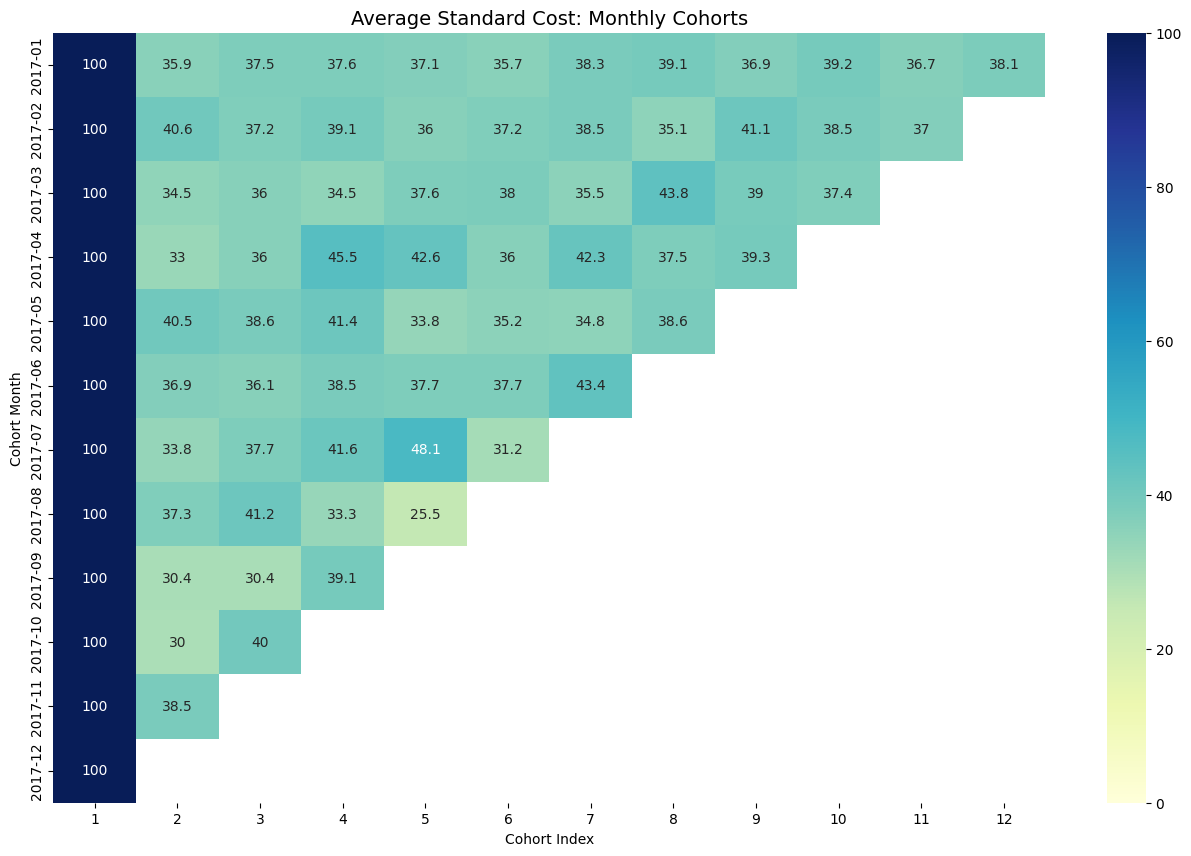

In [67]:
retention_table.index = retention_table.index.strftime('%Y-%m') # format index of retention table into year-month
# Initialize the figure
plt.figure(figsize=(16, 10))
# Adding a title
plt.title('Average Standard Cost: Monthly Cohorts', fontsize = 14)
# Creating the heatmap
sns.heatmap(retention_table, annot = True,vmin = 0.0, vmax =100,cmap="YlGnBu", fmt='g')
plt.ylabel('Cohort Month')
plt.xlabel('Cohort Index')
#plt.yticks( rotation='360')
plt.show()

## Interpreting the retention rate
The most effective way to visualize and analyze cohort analysis data is through a heatmap, as we did above. It provides both the actual metric values and the color-coding to see the differences in the numbers visually.

# Cohort Analysis

###Analyze the trend changes using the heatmap (cohort analysis), then perform root cause analysis to identify the reasons for these changes.

From the above heat map, we could do some cohort analysis that helps business to gain a deeper understanding of their customers by tracking their behavior over a period of time. In this case, we define the cohort by month. For example, in January 2017, 1354 people bought the bicycles. In the next month, 35.9% of those 1354 customers bought the bicycle. In March, 37.5% of this group bought bicycle. Horizontally, the heatmap shows the change of the retention rate of each cohort over user lifetime. However, if we look virtically, the figure shows the change of the retention rate over product life.

In addition, through the color of lightness and darkness in the heat map, we can observe the change of trend of retention rate. For example, for the group of people in cohort month July, the retention rate have a quick decline from November to December. However, for the customers in cohort month September, the retention rate has an obvious increase from 30.4% to 39.1% between these two months.

Also, we can obverse that the change of retention is relatively most stable in cohort month January. But on the contrary, the fluctuations of the retention rate in the cohort month July and August are quite obvious.

#### Conduct root cause analysis. For example, in the heat map, there was a significant drop from 48.1 to 31.2 in July 2017. Why? (Who were the users at 48.1? By joining the relevant tables, we can check what types of users they were—were there more males or females? What job categories did they belong to? Similarly, who were the users at 31.2?) This can help analyze the reasons for the decline.

# Root Cause Analysis

In [68]:
# Join new transaction_df dataset with 2 customer datasets
new_data1 = pd.merge(transaction_df, customerdemographic_df, how="left", on="customer_id")
new_data2 = pd.merge(new_data1, customeraddress_df, how="left", on="customer_id")
new_data2

transaction_id  product_id customer_id transaction_date  online_order  \
0                   1           2        2950       2017-02-25         False   
1                   2           3        3120       2017-05-21          True   
2                   3          37         402       2017-10-16         False   
3                   4          88        3135       2017-08-31         False   
4                   5          78         787       2017-10-01          True   
...               ...         ...         ...              ...           ...   
19995           19996          51        1018       2017-06-24          True   
19996           19997          41         127       2017-11-09          True   
19997           19998          87        2284       2017-04-14          True   
19998           19999           6        2764       2017-07-03         False   
19999           20000          11        1144       2017-09-22          True   

      order_status           brand product_line product_class product_size  \
0         Approved           Solex     Standard        medium       medium   
1         Approved   Trek Bicycles     Standard        medium        large   
2         Approved      OHM Cycles     Standard           low       medium   
3         Approved  Norco Bicycles     Standard        medium       medium   
4         Approved  Giant Bicycles     Standard        medium        large   
...            ...             ...          ...           ...          ...   
19995     Approved      OHM Cycles     Standard          high       medium   
19996     Approved           Solex         Road        medium       medium   
19997     Approved      OHM Cycles     Standard        medium       medium   
19998     Approved      OHM Cycles     Standard          high       medium   
19999     Approved   Trek Bicycles     Standard        medium        small   

       ...  job_industry_category     wealth_segment  deceased_indicator  \
0      ...     Financial Services      Mass Customer                   N   
1      ...                 Health      Mass Customer                   N   
2      ...                 Retail  Affluent Customer                   N   
3      ...     Financial Services      Mass Customer                   N   
4      ...                 Retail  Affluent Customer                   N   
...    ...                    ...                ...                 ...   
19995  ...          Manufacturing      Mass Customer                   N   
19996  ...     Financial Services      Mass Customer                   N   
19997  ...     Telecommunications     High Net Worth                   N   
19998  ...     Financial Services      Mass Customer                   N   
19999  ...                 Health     High Net Worth                   N   

      owns_car tenure               address postcode state    country  \
0          Yes   10.0     984 Hoepker Court     3064   VIC  Australia   
1          Yes   10.0       4 Shopko Circle     2196   NSW  Australia   
2           No   22.0    586 Miller Parkway     2835   NSW  Australia   
3           No   16.0   1617 Harper Parkway     2096   NSW  Australia   
4          Yes    2.0    0601 Stephen Place     2292   NSW  Australia   
...        ...    ...                   ...      ...   ...        ...   
19995      Yes    7.0         3 Hayes Court     3109   VIC  Australia   
19996       No   19.0    0 Pearson Crossing     4405   QLD  Australia   
19997       No   14.0  10055 Old Shore Lane     3630   VIC  Australia   
19998      Yes   20.0       1 Wayridge Park     4301   QLD  Australia   
19999      Yes    5.0      4439 7th Terrace     2177   NSW  Australia   

      property_valuation  
0                      6  
1                      5  
2                      1  
3                     10  
4                      7  
...                  ...  
19995                 10  
19996                  1  
19997                  1  
19998                  1  
19999                 

In [69]:
df_48 = new_data2[(new_data2['CohortMonth'] == '2017-07-01') & (new_data2['CohortIndex'] == 5)]
df_31 = new_data2[(new_data2['CohortMonth'] == '2017-07-01') & (new_data2['CohortIndex'] == 6)]
df_48_31 = df_48.merge(df_31, how ='outer', on = 'customer_id')
df_48_31

transaction_id_x  product_id_x customer_id transaction_date_x  \
0            19710.0          93.0          45         2017-11-17   
1            10186.0          87.0         119         2017-11-30   
2             6243.0           9.0         188         2017-11-21   
3             6243.0           9.0         188         2017-11-21   
4            17493.0          50.0         437         2017-11-12   
..               ...           ...         ...                ...   
63            3992.0           1.0        3172         2017-11-05   
64               NaN           NaN        3203                NaT   
65           17715.0          67.0        3211         2017-11-25   
66            7407.0          91.0        3378         2017-11-05   
67           13119.0          35.0        3395         2017-11-14   

   online_order_x order_status_x         brand_x product_line_x  \
0            True       Approved        WeareA2B       Standard   
1            True       Approved      OHM Cycles       Standard   
2           False       Approved  Norco Bicycles       Standard   
3           False       Approved  Norco Bicycles       Standard   
4            True       Approved        WeareA2B       Standard   
..            ...            ...             ...            ...   
63          False       Approved  Giant Bicycles       Standard   
64            NaN            NaN             NaN            NaN   
65           True       Approved           Solex       Standard   
66          False       Approved           Solex       Standard   
67          False       Approved   Trek Bicycles       Standard   

   product_class_x product_size_x  ...  job_industry_category_y  \
0           medium         medium  ...                      NaN   
1           medium         medium  ...                      NaN   
2           medium          small  ...                 Property   
3           medium          small  ...                 Property   
4           medium          small  ...                      NaN   
..             ...            ...  ...                      ...   
63          medium         medium  ...                      NaN   
64             NaN            NaN  ...            Manufacturing   
65          medium          large  ...                      NaN   
66          medium         medium  ...                      NaN   
67             low         medium  ...       Financial Services   

     wealth_segment_y  deceased_indicator_y owns_car_y tenure_y  \
0                 NaN                   NaN        NaN      NaN   
1                 NaN                   NaN        NaN      NaN   
2      High Net Worth                     N        Yes     13.0   
3      High Net Worth                     N        Yes     13.0   
4                 NaN                   NaN        NaN      NaN   
..                ...                   ...        ...      ...   
63                NaN                   NaN        NaN      NaN   
64  Affluent Customer                     N        Yes      7.0   
65                NaN                   NaN        NaN      NaN   
66                NaN                   NaN        NaN      NaN   
67      Mass Customer                     N         No      3.0   

                address_y postcode_y state_y  country_y property_valuation_y  
0                     NaN        NaN     NaN        NaN                  NaN  
1                     NaN        NaN     NaN        NaN                  NaN  
2    4179 Carioca Terrace       2220     NSW  Australia                   11  
3    4179 Carioca Terrace       2220     NSW  Australia                   11  
4                     NaN        NaN     NaN        NaN                  NaN  
..                    ...        ...     ...        ...                  ...  
63                    NaN        NaN     NaN        NaN                  NaN  
64  60595 Northport Court       4122     QLD  Australia                    8  
65                    NaN        NaN     NaN     

Text(0.5, 0, 'Brands of bicycles')

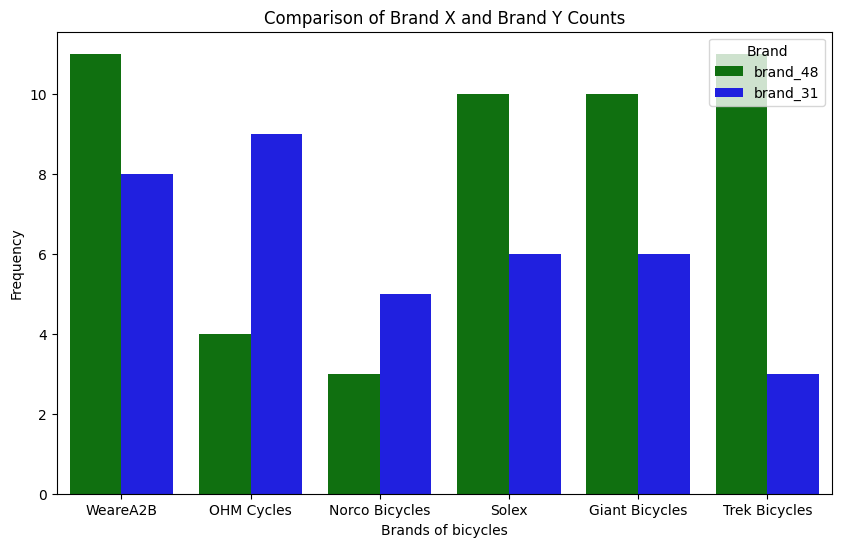

In [70]:
# brand_48 and brand_31
# Rename column name
df_48_31 = df_48_31.rename(columns={"brand_x": "brand_48", "brand_y": "brand_31"})
data1 = pd.melt(df_48_31, value_vars=['brand_48', 'brand_31'], var_name='Brand', value_name='Count')
# Create a count plot with hue
plt.figure(figsize=(10, 6))
sns.countplot(data=data1, x='Count', hue='Brand', palette=['green', 'blue'])  # You can choose any two distinct colors

plt.title('Comparison of Brand X and Brand Y Counts')
plt.ylabel('Frequency')
plt.xlabel('Brands of bicycles')

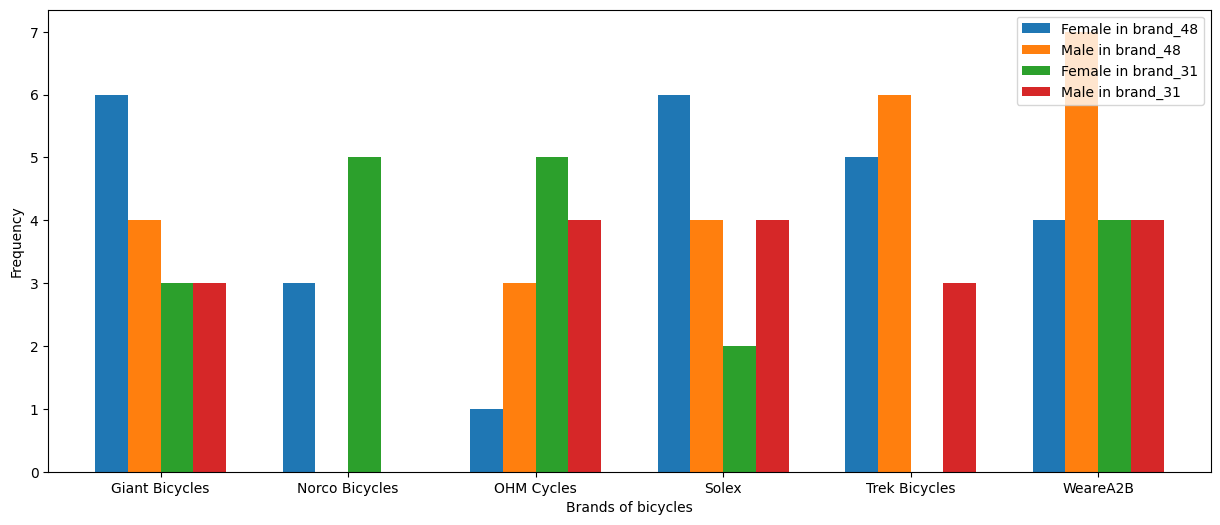

In [71]:
# brand_48 and brand_31
df_48_31 = df_48_31.rename(columns={"gender_x": "gender_48", "gender_y": "gender_31"})

groupby_48_brand = df_48_31.groupby(['brand_48', 'gender_48']).size().unstack(fill_value=0)
groupby_48_brand = groupby_48_brand.rename(columns={"Female": "Female in brand_48", "Male": "Male in brand_48"}) # rename column name
groupby_31_brand = df_48_31.groupby(['brand_31', 'gender_31']).size().unstack(fill_value=0)
groupby_31_brand = groupby_31_brand.rename(columns={"Female": "Female in brand_31", "Male": "Male in brand_31"})# rename column name
groupby_48_31_brand = pd.concat([groupby_48_brand, groupby_31_brand], axis=1)# concate two new dataframes
groupby_48_31_brand[['Female in brand_48','Male in brand_48','Female in brand_31','Male in brand_31']].plot(kind='bar', width=0.7, figsize=(15, 6))
plt.xticks(rotation=0)
plt.xlabel('Brands of bicycles')
plt.ylabel('Frequency')
plt.show()

Text(0.5, 0, 'Job industry category of customers')

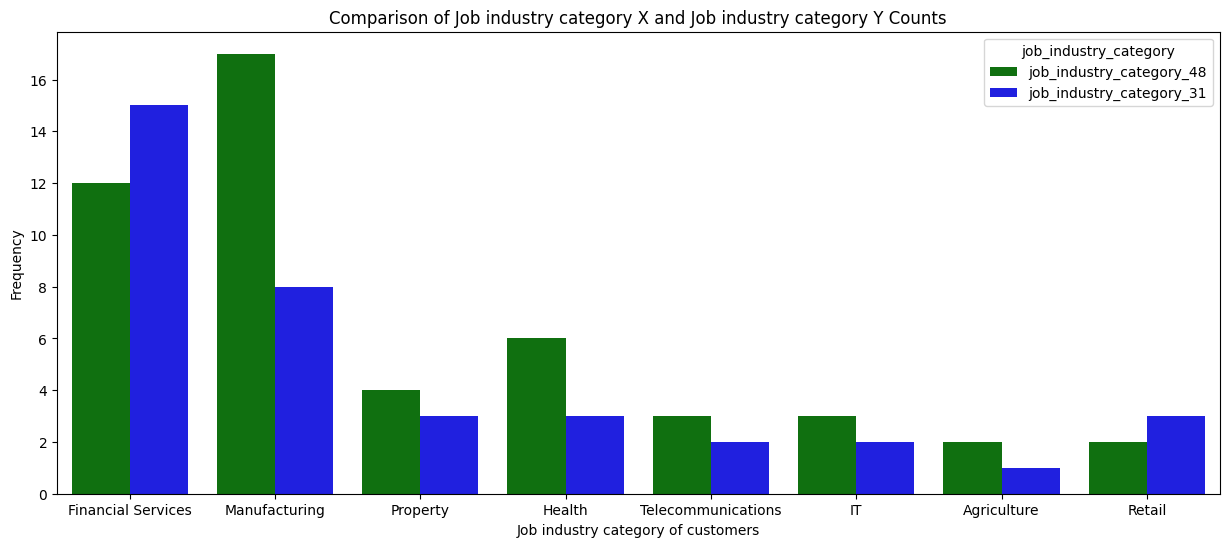

In [72]:
# job_industry_category_48 and job_industry_category_31
# Rename column name
df_48_31 = df_48_31.rename(columns={"job_industry_category_x": "job_industry_category_48", "job_industry_category_y": "job_industry_category_31"})
data1 = pd.melt(df_48_31, value_vars=['job_industry_category_48', 'job_industry_category_31'], var_name='job_industry_category', value_name='Count')
# Create a count plot with hue
plt.figure(figsize=(15, 6))
sns.countplot(data=data1, x='Count', hue='job_industry_category', palette=['green', 'blue'])  # You can choose any two distinct colors

plt.title('Comparison of Job industry category X and Job industry category Y Counts')
plt.ylabel('Frequency')
plt.xlabel('Job industry category of customers')

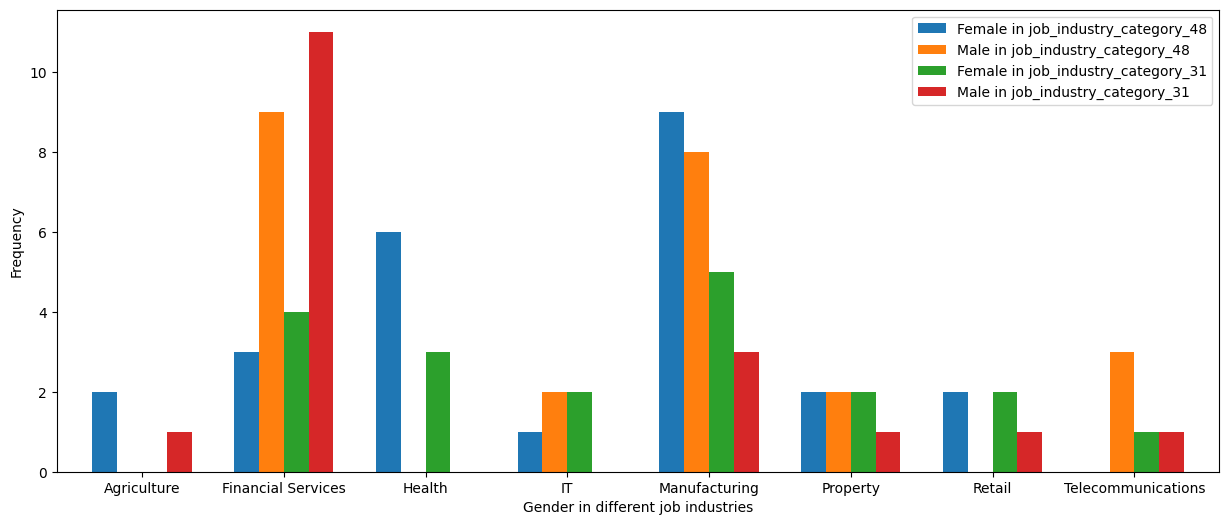

In [73]:
# job_industry_category_48 and job_industry_category_31，+ gender
groupby_48_jobb = df_48_31.groupby(['job_industry_category_48', 'gender_48']).size().unstack(fill_value=0)
groupby_48_jobb = groupby_48_jobb.rename(columns={"Female": "Female in job_industry_category_48", "Male": "Male in job_industry_category_48"}) # rename column name
groupby_31_jobb = df_48_31.groupby(['job_industry_category_31', 'gender_31']).size().unstack(fill_value=0)
groupby_31_jobb = groupby_31_jobb.rename(columns={"Female": "Female in job_industry_category_31", "Male": "Male in job_industry_category_31"})# rename column name
groupby_48_31_jobb = pd.concat([groupby_48_jobb, groupby_31_jobb], axis=1)# concate two new dataframes
groupby_48_31_jobb[["Female in job_industry_category_48", "Male in job_industry_category_48", "Female in job_industry_category_31", "Male in job_industry_category_31",]].plot(kind='bar', width=0.7, figsize=(15, 6))
plt.xticks(rotation=0)
plt.ylabel('Frequency')
plt.xlabel('Gender in different job industries')
plt.show()

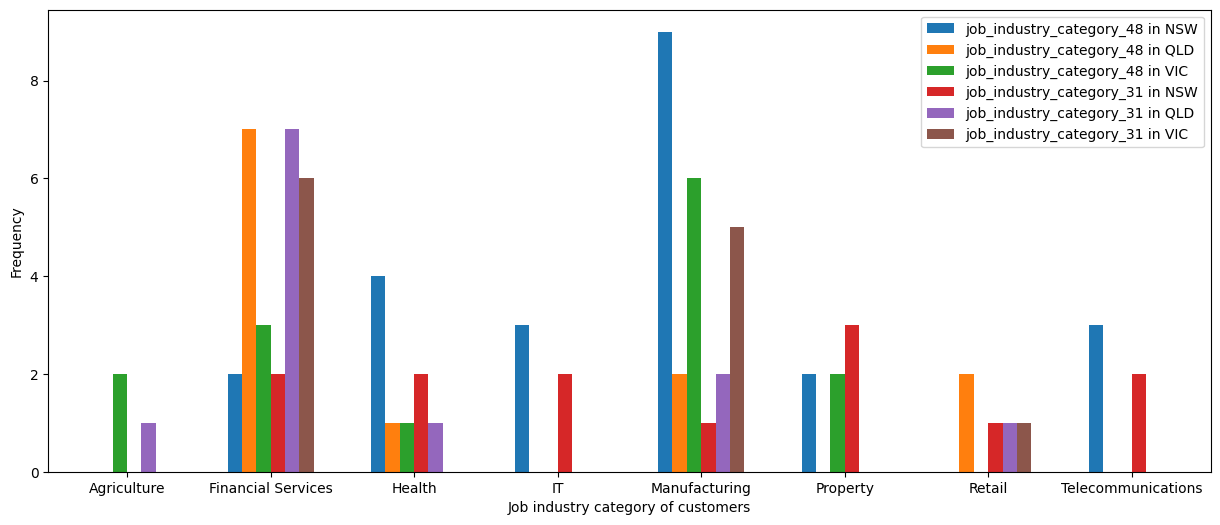

In [74]:
# job_industry_category_48 and job_industry_category_31，+ state
df_48_31 = df_48_31.rename(columns={"state_x": "state_48", "state_y": "state_31"})

groupby_48_job = df_48_31.groupby(['job_industry_category_48', 'state_48']).size().unstack(fill_value=0)
groupby_48_job = groupby_48_job.rename(columns={"NSW": "job_industry_category_48 in NSW", "QLD": "job_industry_category_48 in QLD",
                                                "VIC": "job_industry_category_48 in VIC"}) # rename column name
groupby_31_job = df_48_31.groupby(['job_industry_category_31', 'state_31']).size().unstack(fill_value=0)
groupby_31_job = groupby_31_job.rename(columns={"NSW": "job_industry_category_31 in NSW", "QLD": "job_industry_category_31 in QLD",
                                                "VIC": "job_industry_category_31 in VIC"})# rename column name
groupby_48_31_job = pd.concat([groupby_48_job, groupby_31_job], axis=1)# concate two new dataframes
groupby_48_31_job[["job_industry_category_48 in NSW", "job_industry_category_48 in QLD", "job_industry_category_48 in VIC", "job_industry_category_31 in NSW",
                   "job_industry_category_31 in QLD", "job_industry_category_31 in VIC"]].plot(kind='bar', width=0.6, figsize=(15, 6))
plt.xticks(rotation=0)
plt.ylabel('Frequency')
plt.xlabel('Job industry category of customers')
plt.show()

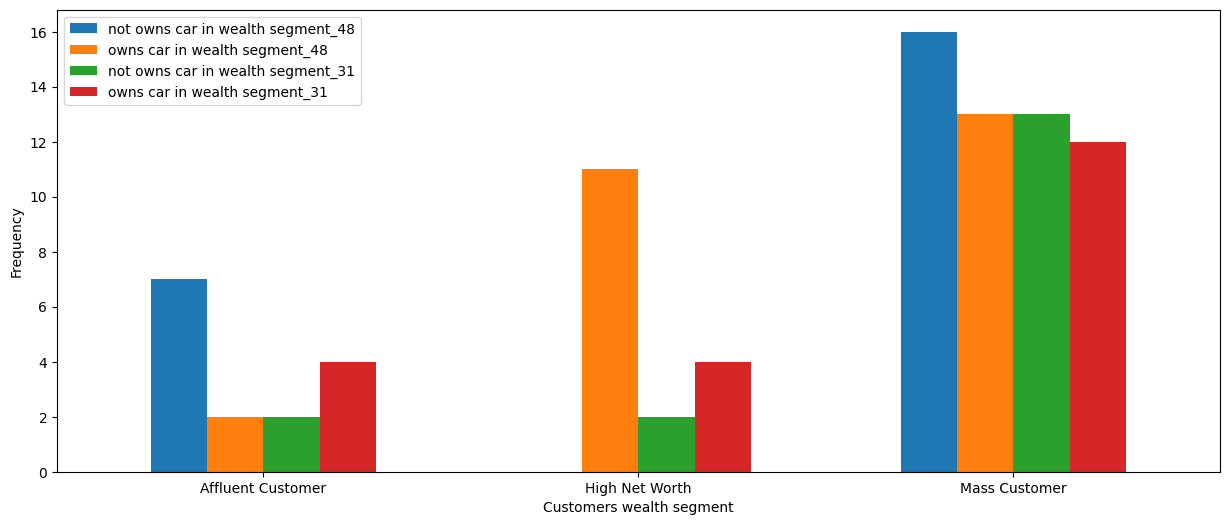

In [75]:
# wealth_segment_48 and wealth_segment_31，+ owns car
df_48_31 = df_48_31.rename(columns={"wealth_segment_x": "wealth_segment_48", "wealth_segment_y": "wealth_segment_31"})
df_48_31 = df_48_31.rename(columns={"owns_car_x": "owns_car_48", "owns_car_y": "owns_car_31"})

groupby_48_wealth = df_48_31.groupby(['wealth_segment_48', 'owns_car_48']).size().unstack(fill_value=0)
groupby_48_wealth = groupby_48_wealth.rename(columns={"No": "not owns car in wealth segment_48", "Yes": "owns car in wealth segment_48"}) # rename column name

groupby_31_wealth = df_48_31.groupby(['wealth_segment_31', 'owns_car_31']).size().unstack(fill_value=0)
groupby_31_wealth = groupby_31_wealth.rename(columns={"No": "not owns car in wealth segment_31", "Yes": "owns car in wealth segment_31"})# rename column name
groupby_48_31_wealth = pd.concat([groupby_48_wealth, groupby_31_wealth], axis=1)# concate two new dataframes
groupby_48_31_wealth
groupby_48_31_wealth[["not owns car in wealth segment_48", "owns car in wealth segment_48", "not owns car in wealth segment_31",
                      "owns car in wealth segment_31"]].plot(kind='bar', width=0.6, figsize=(15, 6))
plt.xticks(rotation=0)
plt.ylabel('Frequency')
plt.xlabel('Customers wealth segment')
plt.show()

Text(0.5, 0, 'age group of customers')

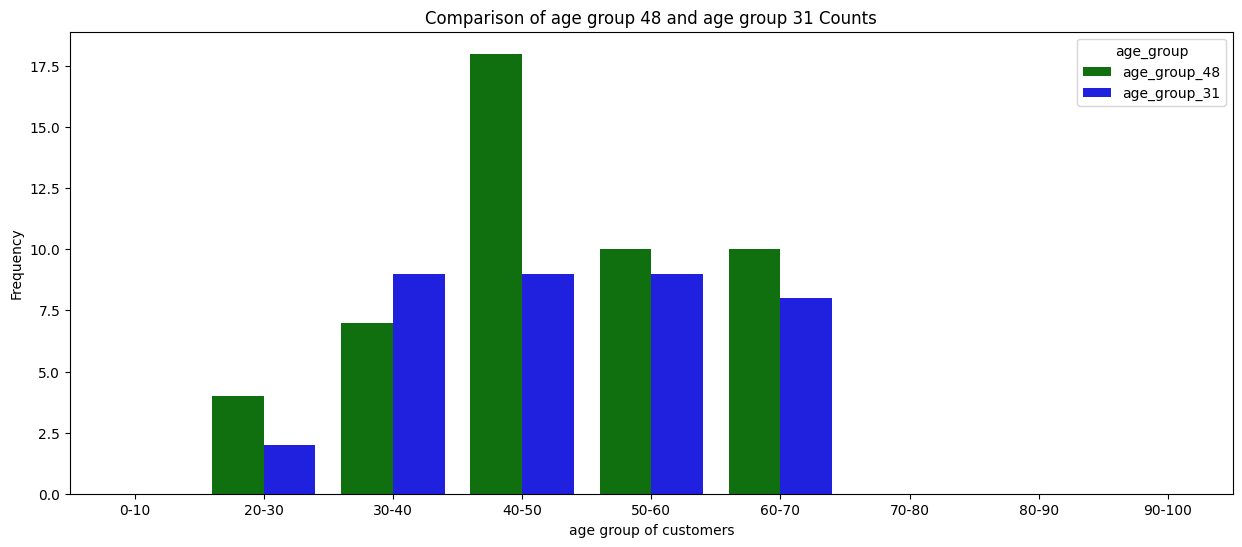

In [76]:
# Changes by age group
# for 48
df_48_31.loc[df_48_31['age_x'].between(0,10), 'age_group_48'] = '0-10'
df_48_31.loc[df_48_31['age_x'].between(20,30), 'age_group_48'] = '20-30'
df_48_31.loc[df_48_31['age_x'].between(40,50), 'age_group_48'] = '40-50'
df_48_31.loc[df_48_31['age_x'].between(60,70), 'age_group_48'] = '60-70'
df_48_31.loc[df_48_31['age_x'].between(80,90), 'age_group_48'] = '80-90'
df_48_31.loc[df_48_31['age_x'].between(10,20), 'age_group_48'] = '10-20'
df_48_31.loc[df_48_31['age_x'].between(30,40), 'age_group_48'] = '30-40'
df_48_31.loc[df_48_31['age_x'].between(50,60), 'age_group_48'] = '50-60'
df_48_31.loc[df_48_31['age_x'].between(70,80), 'age_group_48'] = '70-80'
df_48_31.loc[df_48_31['age_x'].between(90,100), 'age_group_48'] = '90-100'
# for 31
df_48_31.loc[df_48_31['age_y'].between(0,10), 'age_group_31'] = '0-10'
df_48_31.loc[df_48_31['age_y'].between(20,30), 'age_group_31'] = '20-30'
df_48_31.loc[df_48_31['age_y'].between(40,50), 'age_group_31'] = '40-50'
df_48_31.loc[df_48_31['age_y'].between(60,70), 'age_group_31'] = '60-70'
df_48_31.loc[df_48_31['age_y'].between(80,90), 'age_group_31'] = '80-90'
df_48_31.loc[df_48_31['age_y'].between(10,20), 'age_group_31'] = '10-20'
df_48_31.loc[df_48_31['age_y'].between(30,40), 'age_group_31'] = '30-40'
df_48_31.loc[df_48_31['age_y'].between(50,60), 'age_group_31'] = '50-60'
df_48_31.loc[df_48_31['age_y'].between(70,80), 'age_group_31'] = '70-80'
df_48_31.loc[df_48_31['age_y'].between(90,100), 'age_group_31'] = '90-100'

# barplot for the comparison of age group
data1 = pd.melt(df_48_31, value_vars=['age_group_48', 'age_group_31'], var_name='age_group', value_name='Count')
# Create a count plot with hue
plt.figure(figsize=(15, 6))
age_order = ['0-10', '20-30', '30-40', '40-50', '50-60', '60-70', '70-80', '80-90', '90-100']
sns.countplot(data=data1, x='Count', hue='age_group',order=age_order, palette=['green', 'blue'])  # You can choose any two distinct colors

plt.title('Comparison of age group 48 and age group 31 Counts')
plt.ylabel('Frequency')
plt.xlabel('age group of customers')

# RFM analysis

In [77]:
# rencency: Rank each customer by their most recent transaction
new_data2['RecentDate'] = new_data2.groupby('customer_id')['transaction_date'].transform(max) # add recent date
new_data2['RecencyRank'] = new_data2['RecentDate'].rank(method='dense', ascending=False) # add rank based on RecentDate
# frequency：Rank each customer based on the number of transactions they have made
new_data2['TransactionCount'] = new_data2.groupby('customer_id')['customer_id'].transform('count')
new_data2['FrequencyRank'] = new_data2['TransactionCount'].rank(method='dense', ascending=False)
# monetary: Rank each person based on the amount of profit they contributed
new_data2['profit'] = new_data2['list_price'] - new_data2['standard_cost']
new_data2['CustomerTotalProfit'] = new_data2.groupby('customer_id')['profit'].transform('sum')
new_data2['ProfitRank'] = new_data2['CustomerTotalProfit'].rank(method='dense', ascending=False)
# add total rank column
new_data2['TotalRank'] = new_data2[['RecencyRank', 'FrequencyRank', 'ProfitRank']].mean(axis=1)
new_data2 =new_data2.sort_values(by='TotalRank', ascending=True)
# Add Customer Value Category
new_data2['CustomerValueCategory'] = pd.qcut(new_data2['TotalRank'], 3, labels=['High Value Customer', 'Medium Value Customer', 'Low Value Customer'])
new_data2

<ipython-input-77-1bfc24b061ce>:2: FutureWarning: The provided callable <built-in function max> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  new_data2['RecentDate'] = new_data2.groupby('customer_id')['transaction_date'].transform(max) # add recent date


transaction_id  product_id customer_id transaction_date  online_order  \
6825             6826          47         729       2017-08-16          True   
1685             1686          68         322       2017-04-03          True   
13640           13641          51         322       2017-02-17         False   
5168             5169          81         729       2017-12-01         False   
16284           16285          19         322       2017-05-10          True   
...               ...         ...         ...              ...           ...   
15526           15527          60        2525       2017-03-02         False   
13825           13826          41        2876       2017-02-08          True   
13976           13977          28        2807       2017-01-11          True   
15435           15436          95        3272       2017-03-10          True   
1630             1631          22        3292       2017-03-04          True   

      order_status           brand product_line product_class product_size  \
6825      Approved   Trek Bicycles         Road           low        small   
1685      Approved      OHM Cycles     Standard        medium       medium   
13640     Approved      OHM Cycles     Standard          high       medium   
5168      Approved  Norco Bicycles     Standard        medium        small   
16284     Approved      OHM Cycles         Road          high        large   
...            ...             ...          ...           ...          ...   
15526     Approved  Giant Bicycles     Standard          high        small   
13825     Approved  Norco Bicycles     Standard           low       medium   
13976     Approved  Norco Bicycles     Standard        medium        small   
15435     Approved  Giant Bicycles     Standard        medium        large   
1630      Approved        WeareA2B     Standard        medium       medium   

       ...  property_valuation  RecentDate  RecencyRank TransactionCount  \
6825   ...                   9  2017-12-29          2.0               10   
1685   ...                   6  2017-12-29          2.0               12   
13640  ...                   6  2017-12-29          2.0               12   
5168   ...                   9  2017-12-29          2.0               10   
16284  ...                   6  2017-12-29          2.0               12   
...    ...                 ...         ...          ...              ...   
15526  ...                   2  2017-03-02        266.0                1   
13825  ...                  10  2017-02-08        272.0                1   
13976  ...                   6  2017-01-11        276.0                1   
15435  ...                   3  2017-03-10        262.0                1   
1630   ...                  10  2017-03-04        265.0                1   

      FrequencyRank   profit CustomerTotalProfit ProfitRank    TotalRank  \
6825            5.0   189.28            10497.78        5.0     4.000000   
1685            3.0  1592.19            10341.57        7.0     4.000000   
13640           3.0   802.26            10341.57        7.0     4.000000   
5168            5.0    64.51            10497.78        5.0     4.000000   
16284           3.0     4.80            10341.57        7.0     4.000000   
...             ...      ...                 ...        ...          ...   
15526          14.0   217.51              217.51     3433.0  1237.666667   
13825          14.0   209.84              209.84     3436.0  1240.666667   
13976          14.0   133.78              133.78     3456.0  1248.666667   
15435          14.0    41.13               41.13     3476.0  1250.666667   
1630           14.0    15.08               15.08     3479.0  1252.666667   

      CustomerValueCategory  
6825    High Value Customer  
1685    High Value Customer  
13640   High Value Customer  
5168    High Value Customer  
16284   High Value Customer  
...                     ...  
15526    Low Value Customer  
13825    Low Value Customer  
13976    Low 

In [78]:
df_48_rfm = new_data2[(new_data2['CohortMonth'] == '2017-07-01') & (new_data2['CohortIndex'] == 5)]
df_31_rfm = new_data2[(new_data2['CohortMonth'] == '2017-07-01') & (new_data2['CohortIndex'] == 6)]
df_48_31_rfm = df_48_rfm.merge(df_31_rfm, how ='outer', on = 'customer_id')
df_48_31_rfm

transaction_id_x  product_id_x customer_id transaction_date_x  \
0            19710.0          93.0          45         2017-11-17   
1            10186.0          87.0         119         2017-11-30   
2             6243.0           9.0         188         2017-11-21   
3             6243.0           9.0         188         2017-11-21   
4            17493.0          50.0         437         2017-11-12   
..               ...           ...         ...                ...   
63            3992.0           1.0        3172         2017-11-05   
64               NaN           NaN        3203                NaT   
65           17715.0          67.0        3211         2017-11-25   
66            7407.0          91.0        3378         2017-11-05   
67           13119.0          35.0        3395         2017-11-14   

   online_order_x order_status_x         brand_x product_line_x  \
0            True       Approved        WeareA2B       Standard   
1            True       Approved      OHM Cycles       Standard   
2           False       Approved  Norco Bicycles       Standard   
3           False       Approved  Norco Bicycles       Standard   
4            True       Approved        WeareA2B       Standard   
..            ...            ...             ...            ...   
63          False       Approved  Giant Bicycles       Standard   
64            NaN            NaN             NaN            NaN   
65           True       Approved           Solex       Standard   
66          False       Approved           Solex       Standard   
67          False       Approved   Trek Bicycles       Standard   

   product_class_x product_size_x  ...  property_valuation_y  RecentDate_y  \
0           medium         medium  ...                   NaN           NaT   
1           medium         medium  ...                   NaN           NaT   
2           medium          small  ...                    11    2017-12-15   
3           medium          small  ...                    11    2017-12-15   
4           medium          small  ...                   NaN           NaT   
..             ...            ...  ...                   ...           ...   
63          medium         medium  ...                   NaN           NaT   
64             NaN            NaN  ...                     8    2017-12-23   
65          medium          large  ...                   NaN           NaT   
66          medium         medium  ...                   NaN           NaT   
67             low         medium  ...                     8    2017-12-21   

    RecencyRank_y TransactionCount_y FrequencyRank_y  profit_y  \
0             NaN                NaN             NaN       NaN   
1             NaN                NaN             NaN       NaN   
2            16.0                6.0             9.0    139.23   
3            16.0                6.0             9.0    693.76   
4             NaN                NaN             NaN       NaN   
..            ...                ...             ...       ...   
63            NaN                NaN             NaN       NaN   
64            8.0                3.0            12.0    217.51   
65            NaN                NaN             NaN       NaN   
66            NaN                NaN             NaN       NaN   
67           10.0                7.0             8.0    155.65   

   CustomerTotalProfit_y ProfitRank_y  TotalRank_y CustomerValueCategory_y  
0                    NaN          NaN          NaN                     NaN  
1                    NaN          NaN          NaN                     NaN  
2                2658.87       1948.0   657.666667   Medium Value Customer  
3                2658.87       1948.0   657.666667   Medium Value Customer  
4                    NaN          NaN          NaN                     NaN  
..                   ...          ...          ...                     ...  
63                   NaN          NaN          NaN                     NaN  
64               1744.21

Text(0.5, 0, 'Customer Value Category')

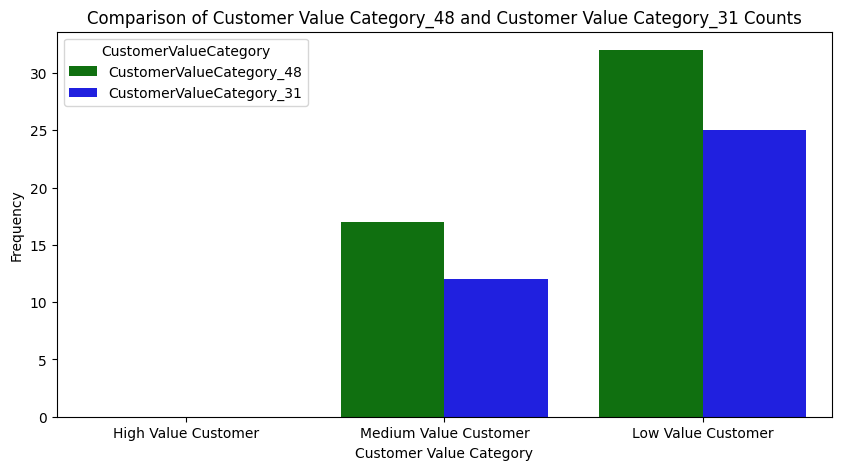

In [79]:
#CustomerValueCategory_48 and CustomerValueCategory_31
# Rename column name
df_48_31_rfm = df_48_31_rfm.rename(columns={"CustomerValueCategory_x": "CustomerValueCategory_48", "CustomerValueCategory_y": "CustomerValueCategory_31"})
data1_rfm = pd.melt(df_48_31_rfm, value_vars=['CustomerValueCategory_48', 'CustomerValueCategory_31'], var_name='CustomerValueCategory', value_name='Count')
data1_rfm
# Create a count plot with hue
plt.figure(figsize=(10, 5))
sns.countplot(data=data1_rfm, x='Count', hue='CustomerValueCategory', palette=['green', 'blue'])  # You can choose any two distinct colors

plt.title('Comparison of Customer Value Category_48 and Customer Value Category_31 Counts')
plt.ylabel('Frequency')
plt.xlabel('Customer Value Category')

<ipython-input-80-38daa1f7dcf0>:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  groupby_48_brand_rfm = df_48_31_rfm.groupby(['brand_48', 'CustomerValueCategory_48']).size().unstack(fill_value=0)
<ipython-input-80-38daa1f7dcf0>:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  groupby_31_brand_rfm = df_48_31_rfm.groupby(['brand_31', 'CustomerValueCategory_31']).size().unstack(fill_value=0)


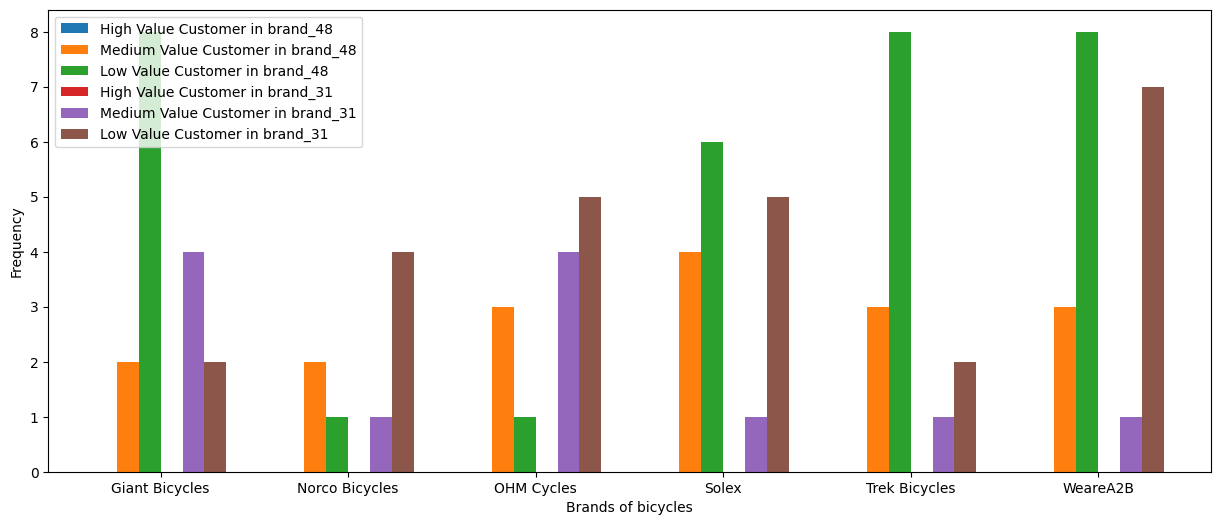

In [80]:
# see which bicycle brands customers with different values prefer
# brand_48 and brand_31
# rename column
df_48_31_rfm = df_48_31_rfm.rename(columns={"brand_x": "brand_48", "brand_y": "brand_31"})
groupby_48_brand_rfm = df_48_31_rfm.groupby(['brand_48', 'CustomerValueCategory_48']).size().unstack(fill_value=0)
groupby_48_brand_rfm = groupby_48_brand_rfm.rename(columns={"High Value Customer": "High Value Customer in brand_48", "Medium Value Customer": "Medium Value Customer in brand_48",
                                                            "Low Value Customer": "Low Value Customer in brand_48"}) # rename column name
groupby_31_brand_rfm = df_48_31_rfm.groupby(['brand_31', 'CustomerValueCategory_31']).size().unstack(fill_value=0)
groupby_31_brand_rfm = groupby_31_brand_rfm.rename(columns={"High Value Customer": "High Value Customer in brand_31", "Medium Value Customer": "Medium Value Customer in brand_31",
                                                            "Low Value Customer": "Low Value Customer in brand_31"}) # rename column name
groupby_48_31_brand_rfm = pd.concat([groupby_48_brand_rfm, groupby_31_brand_rfm], axis=1)# concate two new dataframes
groupby_48_31_brand_rfm[["High Value Customer in brand_48", "Medium Value Customer in brand_48", "Low Value Customer in brand_48", "High Value Customer in brand_31",
                         "Medium Value Customer in brand_31", "Low Value Customer in brand_31"]].plot(kind='bar', width=0.7, figsize=(15, 6))
plt.xticks(rotation=0)
plt.xlabel('Brands of bicycles')
plt.ylabel('Frequency')
plt.show()

<ipython-input-81-f21fca300fca>:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  groupby_48_product_class_rfm = df_48_31_rfm.groupby(['product_class_48', 'CustomerValueCategory_48']).size().unstack(fill_value=0)
<ipython-input-81-f21fca300fca>:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  groupby_31_product_class_rfm = df_48_31_rfm.groupby(['product_class_31', 'CustomerValueCategory_31']).size().unstack(fill_value=0)


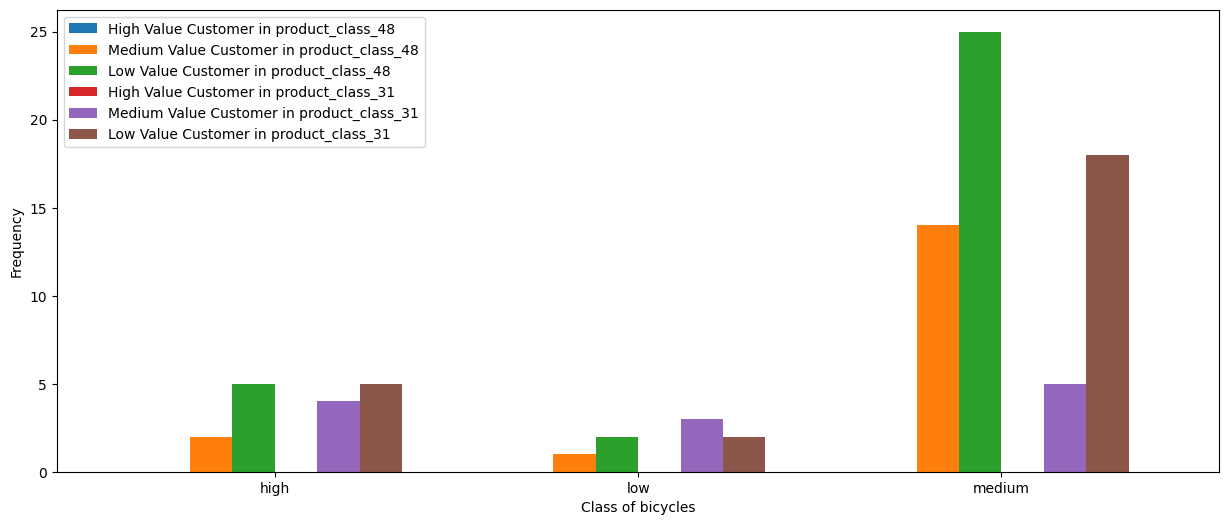

In [81]:
# see which bicycle class customers with different values prefer
# product_class_48 and product_class_31
# rename column
df_48_31_rfm = df_48_31_rfm.rename(columns={"product_class_x": "product_class_48", "product_class_y": "product_class_31"})
groupby_48_product_class_rfm = df_48_31_rfm.groupby(['product_class_48', 'CustomerValueCategory_48']).size().unstack(fill_value=0)
groupby_48_product_class_rfm = groupby_48_product_class_rfm.rename(columns={"High Value Customer": "High Value Customer in product_class_48", "Medium Value Customer": "Medium Value Customer in product_class_48",
                                                             "Low Value Customer": "Low Value Customer in product_class_48"}) # rename column name
groupby_31_product_class_rfm = df_48_31_rfm.groupby(['product_class_31', 'CustomerValueCategory_31']).size().unstack(fill_value=0)
groupby_31_product_class_rfm = groupby_31_product_class_rfm.rename(columns={"High Value Customer": "High Value Customer in product_class_31", "Medium Value Customer": "Medium Value Customer in product_class_31",
                                                             "Low Value Customer": "Low Value Customer in product_class_31"}) # rename column name
groupby_48_31_product_class_rfm = pd.concat([groupby_48_product_class_rfm, groupby_31_product_class_rfm], axis=1)# concate two new dataframes
groupby_48_31_product_class_rfm[["High Value Customer in product_class_48", "Medium Value Customer in product_class_48", "Low Value Customer in product_class_48", "High Value Customer in product_class_31",
                          "Medium Value Customer in product_class_31", "Low Value Customer in product_class_31"]].plot(kind='bar', width=0.7, figsize=(15, 6))
plt.xticks(rotation=0)
plt.xlabel('Class of bicycles')
plt.ylabel('Frequency')
plt.show()


<ipython-input-82-08d14fd8792b>:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  groupby_48_product_size_rfm = df_48_31_rfm.groupby(['product_size_48', 'CustomerValueCategory_48']).size().unstack(fill_value=0)
<ipython-input-82-08d14fd8792b>:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  groupby_31_product_size_rfm = df_48_31_rfm.groupby(['product_size_31', 'CustomerValueCategory_31']).size().unstack(fill_value=0)


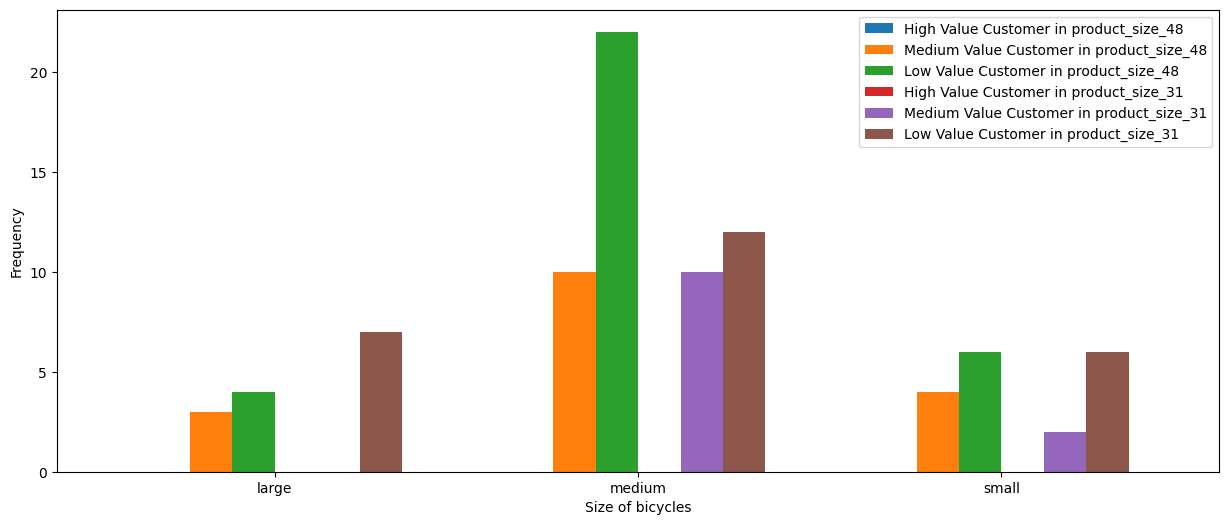

In [82]:
# see which bicycle size customers with different values prefer
# product_size_48 and product_size_31
# rename column
df_48_31_rfm = df_48_31_rfm.rename(columns={"product_size_x": "product_size_48", "product_size_y": "product_size_31"})
groupby_48_product_size_rfm = df_48_31_rfm.groupby(['product_size_48', 'CustomerValueCategory_48']).size().unstack(fill_value=0)
groupby_48_product_size_rfm = groupby_48_product_size_rfm.rename(columns={"High Value Customer": "High Value Customer in product_size_48", "Medium Value Customer": "Medium Value Customer in product_size_48",
                                                             "Low Value Customer": "Low Value Customer in product_size_48"}) # rename column name
groupby_31_product_size_rfm = df_48_31_rfm.groupby(['product_size_31', 'CustomerValueCategory_31']).size().unstack(fill_value=0)
groupby_31_product_size_rfm = groupby_31_product_size_rfm.rename(columns={"High Value Customer": "High Value Customer in product_size_31", "Medium Value Customer": "Medium Value Customer in product_size_31",
                                                             "Low Value Customer": "Low Value Customer in product_size_31"}) # rename column name
groupby_48_31_product_size_rfm = pd.concat([groupby_48_product_size_rfm, groupby_31_product_size_rfm], axis=1)# concate two new dataframes
groupby_48_31_product_size_rfm[["High Value Customer in product_size_48", "Medium Value Customer in product_size_48", "Low Value Customer in product_size_48", "High Value Customer in product_size_31",
                          "Medium Value Customer in product_size_31", "Low Value Customer in product_size_31"]].plot(kind='bar', width=0.7, figsize=(15, 6))
plt.xticks(rotation=0)
plt.xlabel('Size of bicycles')
plt.ylabel('Frequency')
plt.show()
